# <font color = 'color'>모두의 딥러닝: 13장(p.155)</font>

# 데이터분할을 통한 과적합방지

# <font color = 'blue'>문제 정의</font>

### 소나신호 광석탐지  데이터셋(Wine Quality Dataset )
* 이진/이항(binary-class) 분류(classification) 문제
* 해저에 있는 금속광물과 암석에 대한 수중 음파 신호 탐지기 신호를 분류하는 문제상황

<img src = './../../images/sonar.png'>

In [1]:
# 웹브라우저 라이브러리 이용 해당 파일위치 확인
# import webbrowser
# webbrowser.open('https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29')

1. 피처(입력/예측/독립)변수
    * v1 ~ v60: 해저 음파신호 탐지기로 수신한 60개 신호특성 데이터 <pre>
* 타깃(출력/반응/종속)변수
    * class: 신호종류: 금속광물(M: Mines), 일반암석(R: Rocks)

# <font color = 'blue'>데이터 준비</font>

### 데이터가 위치한 경로파악

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01. 판다스기본.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '02. 판다스 데이터프레임과 시리즈.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03. 그래프 그리기.ipynb',
 '03.그래프 그리기(매트플롯리브 패키지 중심).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04. 데이터 연결하기.ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장 (1).ipynb',
 '05. 결측치 처리하기(일부코드).ipynb',
 '05. 결측치 처리하기.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '06. 깔끔한(tidy) 데이터 만들기.ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07. 판다스 자료형 다루기.ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08. 문자열 다루기.ipynb',
 '09. matplotlib와 한글폰트.ipynb',
 '10. 정규표현식 다루기.ipynb',
 '1장. sklearn패키지_iris 데이터셋(knn분류예측).ipynb',
 '2장. mglearn패키지_forge 데이터셋(knn분류예측).ipynb',
 'cancer_tree.dot',
 'cancer_tree.png',
 'GermanCredit.csv',
 'iris_md4_rb.h5',
 'mychar.ipynb',
 'mychar.py',
 'tmp',
 'tmp.png',
 'Untitled.ipynb',
 '__pycache__',
 '데이터연결연습용 데이터셋.zip',
 '뮐가런_2.3.2_k-최근접이웃_mglearn패키지_wave 데이터(knn최근접

In [5]:
os.listdir(path = './../../data')

['billboard.csv',
 'concat',
 'country_timeseries.csv',
 'gapminder.tsv',
 'iris.csv',
 'iris_new.csv',
 'name.xls',
 'name.xlsx',
 'pew.csv',
 'pima-indians-diabetes.csv',
 'pima_new.csv',
 'sci.xls',
 'sci.xlsx',
 'scientists.csv',
 'scientists_df.csv',
 'scientists_df.pickle',
 'scientists_df.tsv',
 'scientists_name.csv',
 'scientists_name.pickle',
 'scientists_name.tsv',
 'sonar.csv',
 'weather.csv',
 'weather_survey',
 '데이터연결연습용 데이터셋.zip']

### 데이터 로딩

In [6]:
# pandas를 이용한 데이터프레임 겍체로 로딩
import pandas as pd

In [7]:
# 헤더가 없는 데이터셋 그대로 로딩
# - df: dataframe
df = pd.read_csv('./../../data/sonar.csv', header = None, sep = ',')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
# 현재 변수컬럼은 번호 인덱스로 되어 있음
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [7]:
# 변수컬럼 입력
df.columns = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 
              'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 
              'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 
              'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 
              'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 
              'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'class']
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
# 헤더가 없는 데이터셋에 변수컬럼명을 직접입력하면서 로딩
# - dt: datatable
dt = pd.read_csv('./../../data/sonar.csv', header = None, sep = ',',
                 names = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 
                          'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 
                          'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 
                          'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 
                          'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 
                          'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'class'])
dt.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
print(type(dt), df.shape, '\n') # 객체유형과 규모(행, 열)파악
print(dt.columns, '\n') # 변수컬럼명 파악
print(dt.index, '\n') # 행번호 파악
print(dt.values) # raw데이터 파악

<class 'pandas.core.frame.DataFrame'> (208, 61) 

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51',
       'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'class'],
      dtype='object') 

RangeIndex(start=0, stop=208, step=1) 

[[0.02 0.0371 0.0428 ... 0.009 0.0032 'R']
 [0.0453 0.0523 0.0843 ... 0.0052 0.0044 'R']
 [0.0262 0.0582 0.1099 ... 0.0095 0.0078 'R']
 ...
 [0.0522 0.0437 0.018 ... 0.0077 0.0031 'M']
 [0.0303 0.0353 0.049 ... 0.0036 0.0048 'M']
 [0.026 0.0363 0.0136 ... 0.0061 0.0115 'M']]


In [10]:
# numpy를 이용한 다차원배열 겍체로 로딩
# - da: data
import numpy as np
da = np.loadtxt('./dataset/sonar.csv', delimiter = ',',
                dtype={'names': ('v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 
                          'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 
                          'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 
                          'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 
                          'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 
                          'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'class'), 
                       'formats': ('f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 
                                   'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4',
                                   'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4',
                                   'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4',
                                   'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4',
                                   'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'str')})
print(type(da), da.shape)
print()
da[0:3]

<class 'numpy.ndarray'> (208,)



array([(0.02  , 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066 , 0.2273, 0.31  , 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555 , 0.6711, 0.6415, 0.7104, 0.808 , 0.6791, 0.3857, 0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744, 0.051 , 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.018 , 0.0084, 0.009 , 0.0032, ''),
       (0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481, 0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444, 1.    , 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914, 0.325 , 0.32  , 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947, 0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.184 , 0.197 , 0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.053 , 0.0742, 0.0409, 0.0061, 0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191, 0.014 , 0.0049, 0.0052, 0.0044, ''),
       (0.0262

# <font color = 'blue'>데이터 탐색</font>

### 간단조회

In [11]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [12]:
df.tail()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


### 데이터셋 구조형식 특성파악

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
v1       208 non-null float64
v2       208 non-null float64
v3       208 non-null float64
v4       208 non-null float64
v5       208 non-null float64
v6       208 non-null float64
v7       208 non-null float64
v8       208 non-null float64
v9       208 non-null float64
v10      208 non-null float64
v11      208 non-null float64
v12      208 non-null float64
v13      208 non-null float64
v14      208 non-null float64
v15      208 non-null float64
v16      208 non-null float64
v17      208 non-null float64
v18      208 non-null float64
v19      208 non-null float64
v20      208 non-null float64
v21      208 non-null float64
v22      208 non-null float64
v23      208 non-null float64
v24      208 non-null float64
v25      208 non-null float64
v26      208 non-null float64
v27      208 non-null float64
v28      208 non-null float64
v29      208 non-null float64
v30      208 non-null flo

### 데이터셋 간단 기술통계분석

In [14]:
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# <font color = 'blue'>데이터 인덱싱</font>

### 피처 단일인덱싱
* 한 번에 한 개 변수컬럼을 인덱싱하는 방법

In [15]:
df.v1.head(3)
# - df 데이터프레임 객체의 속성 중의 하나로 BMI을 간주해 점(.속성)을 찍어 인덱싱
# - 인덱싱 결과 facid 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    0.0200
1    0.0453
2    0.0262
Name: v1, dtype: float64

In [16]:
df['v1'].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 인덱싱 결과 facid 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    0.0200
1    0.0453
2    0.0262
Name: v1, dtype: float64

In [17]:
df[['v1']].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임
# - 인덱싱 결과 facid 변수컬럼으로 구성된 pandas DataFrame 객체형식임

,v1
0,0.0200
1,0.0453
2,0.0262


In [18]:
type(df[['v1']].head(3))
# - 인덱싱 결과 facid 변수컬럼으로 구성된 pandas DataFrame 객체형식임

pandas.core.frame.DataFrame

### 피처 복수인덱싱
* 여러 개의 원하는 변수컬럼을 선별해서 동시에 인덱싱하는 방법

In [19]:
df[['v1', 'class']].head(3)
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임

,v1,class
0,0.0200,R
1,0.0453,R
2,0.0262,R


In [20]:
df.loc[:, ['v1', 'class']].head(3)
# - .loc 메서드는 인덱싱하고자 하는 변수컬럼의 이름을 이용하는 방식임 

,v1,class
0,0.0200,R
1,0.0453,R
2,0.0262,R


In [21]:
df.iloc[:, [0, 60]].head(3)
# - .iloc 메서드는 인덱싱하고자 하는 변수컬럼의 인덱스번호를 사용하는 방식임 

,v1,class
0,0.0200,R
1,0.0453,R
2,0.0262,R


### 피처 슬라이싱
* 연속적으로 붙어있는 여러 개 변수컬럼을 동시에 인덱싱하는 방법

In [22]:
df.iloc[:, 0:5].head(3)

,v1,v2,v3,v4,v5
0,0.0200,0.0371,0.0428,0.0207,0.0954
1,0.0453,0.0523,0.0843,0.0689,0.1183
2,0.0262,0.0582,0.1099,0.1083,0.0974


# <font color = 'blue'>데이터 그래프 탐색</font>

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df.head(2) # 변수컬럼 이름확인

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


### 피처셋 전체분포비교

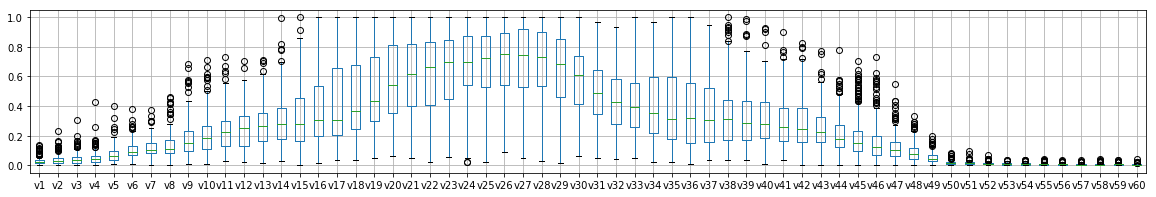

In [25]:
df.boxplot(figsize=(20, 3))

### 피처와 클래스 관련성 파악

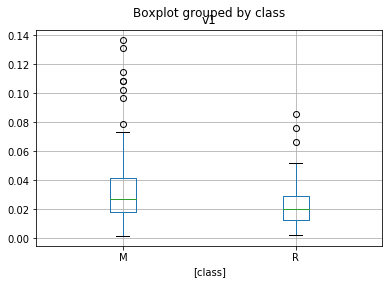

In [26]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
box = df[['v1', 'class']].boxplot(by='class')
# - matplotlib.pyplot 이용

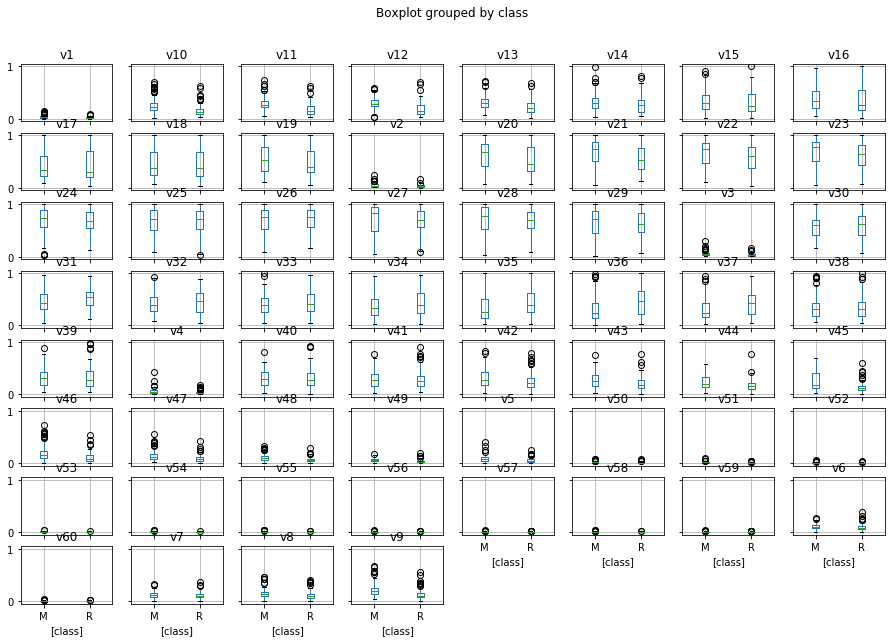

In [27]:
# 피처변수에 따른 클래스 분류 가능성 탐색
box = df.boxplot(by='class', figsize=(15, 10))
# - matplotlib.pyplot 이용

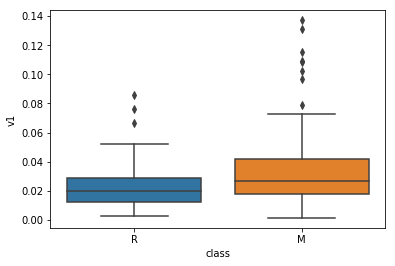

In [28]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
sns.boxplot(x = "class", y = 'v1', data = df)
# - seaborn 라이브러리 이용

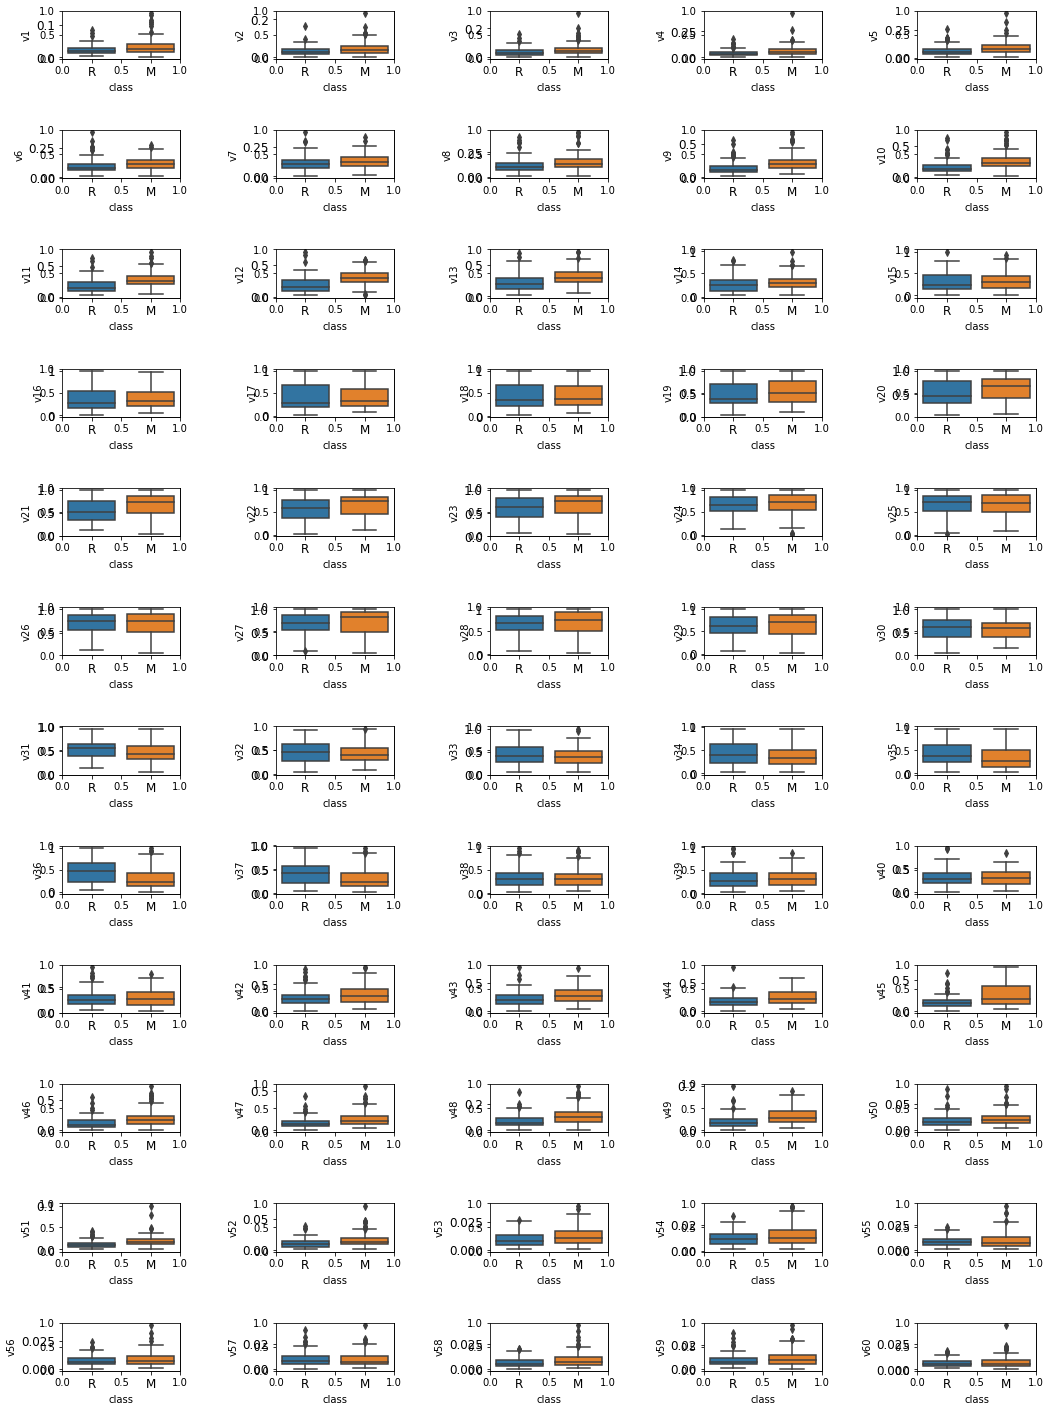

In [29]:
# 피처변수에 따른 클래스 분류 가능성 탐색
fig, axes = plt.subplots(12, 5, figsize = (15, 20))
for idx, feature in enumerate(list(df.columns)[:-1]):
    ax = fig.add_subplot(12, 5, idx + 1)
    box = sns.boxplot(x = 'class', y = feature, data = df, ax = ax)
    plt.setp(box.get_xticklabels(), fontsize = 12)
    plt.setp(box.get_yticklabels(), fontsize = 12)
fig.tight_layout() 
# - seaborn 라이브러리 이용

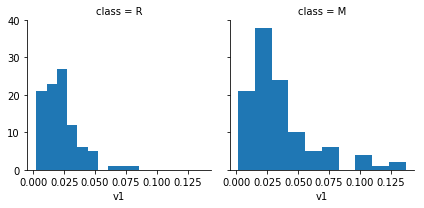

In [30]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'v1', bins = 10)

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


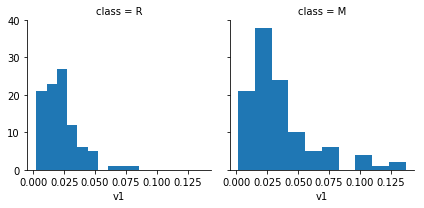

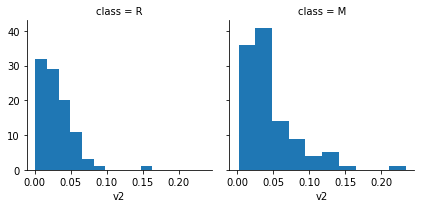

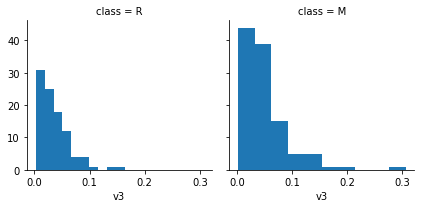

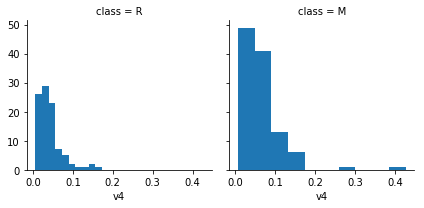

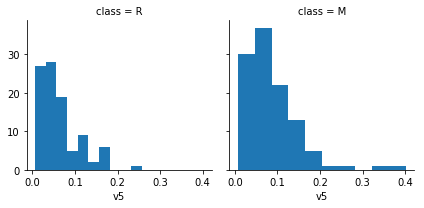

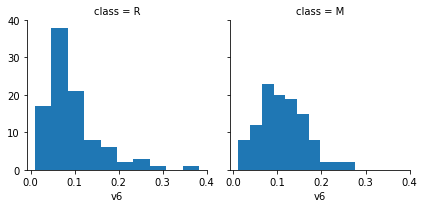

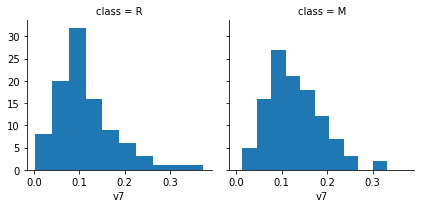

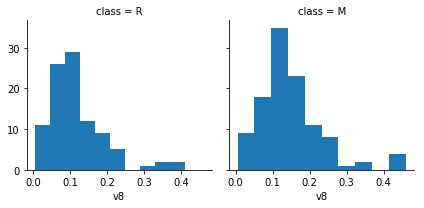

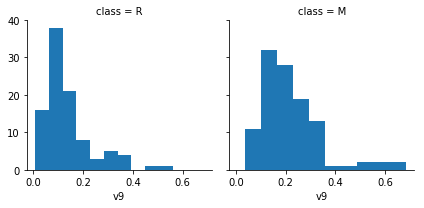

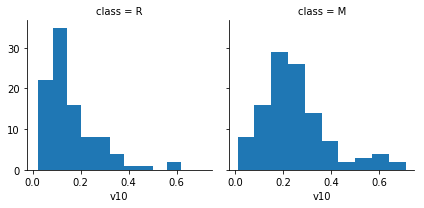

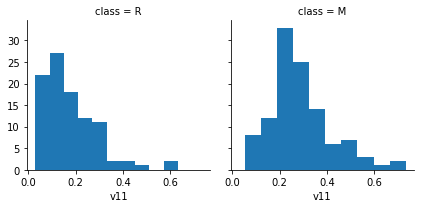

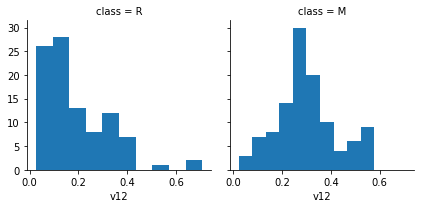

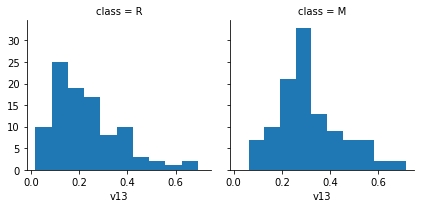

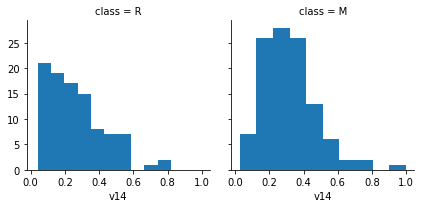

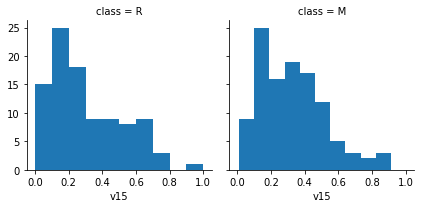

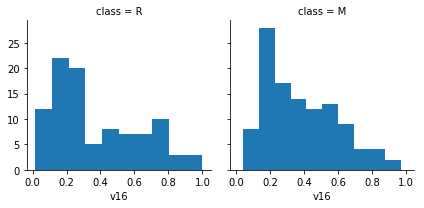

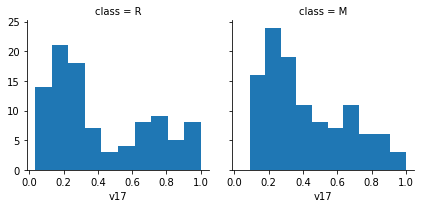

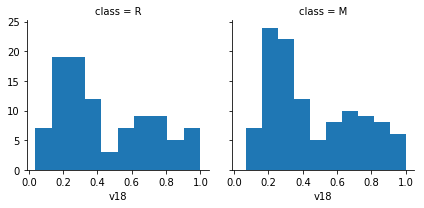

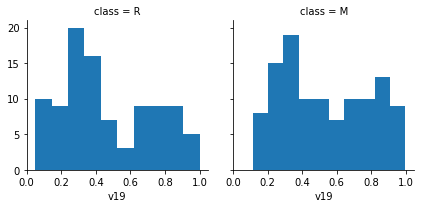

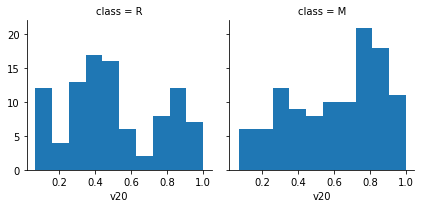

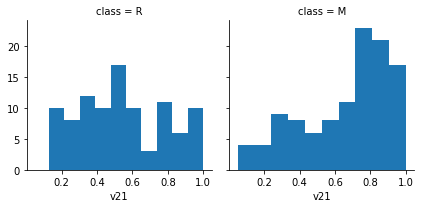

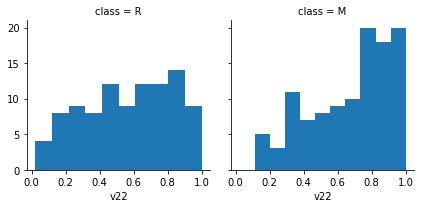

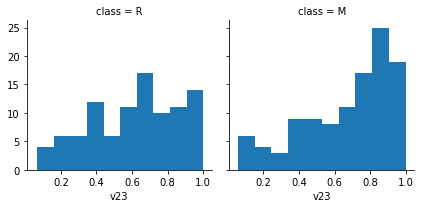

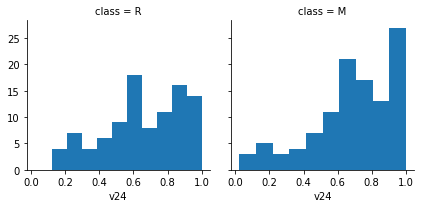

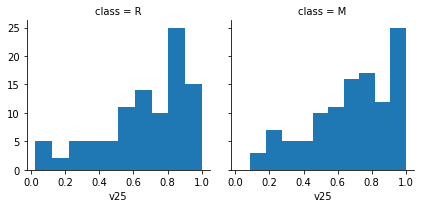

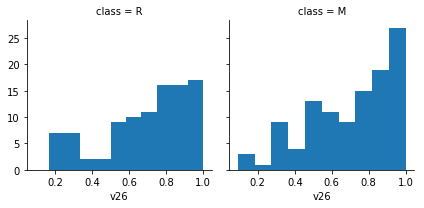

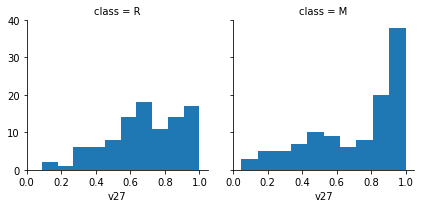

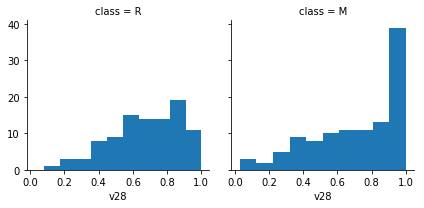

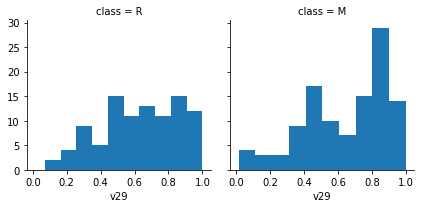

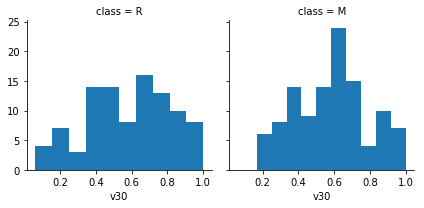

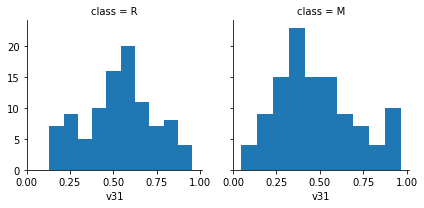

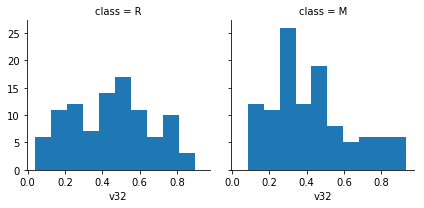

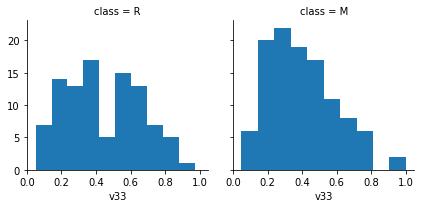

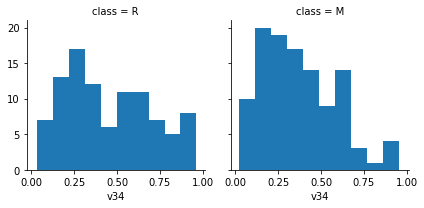

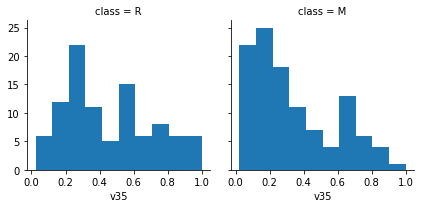

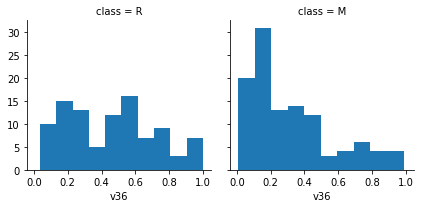

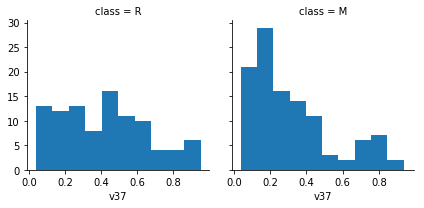

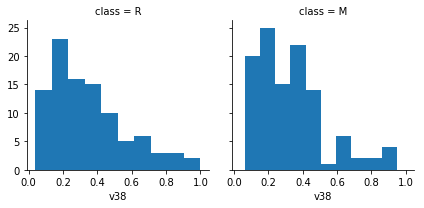

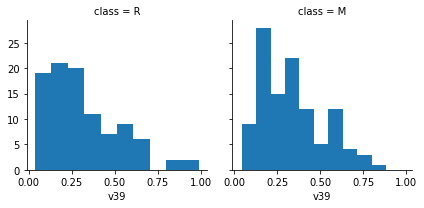

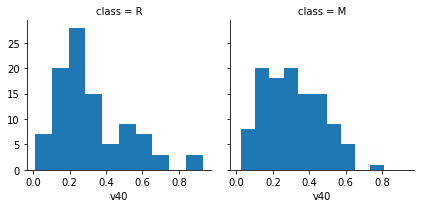

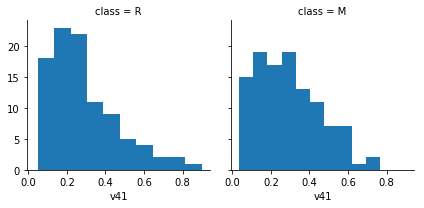

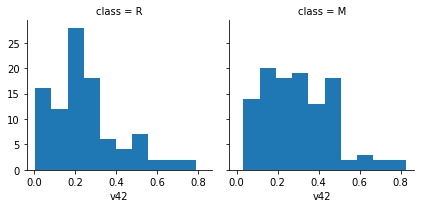

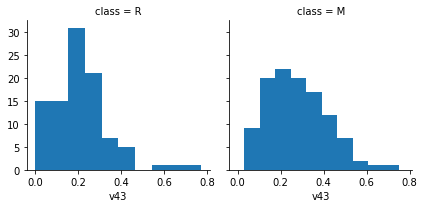

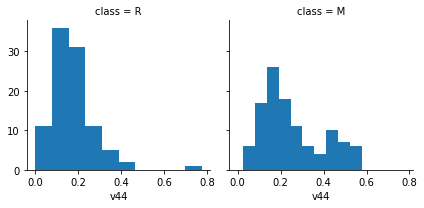

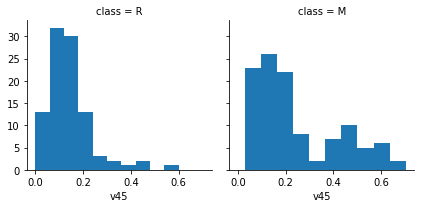

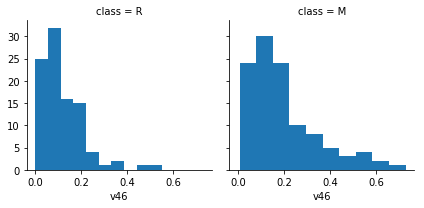

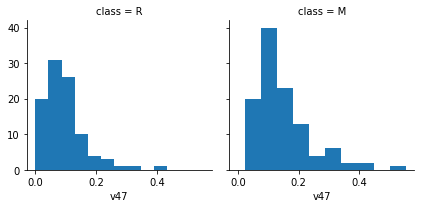

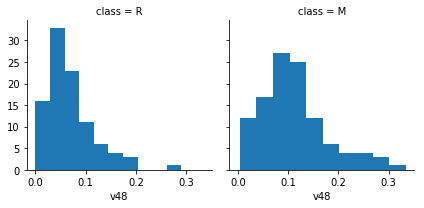

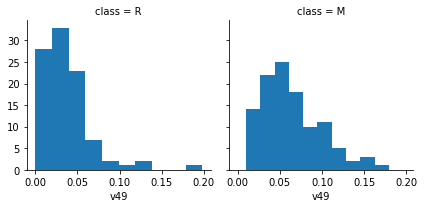

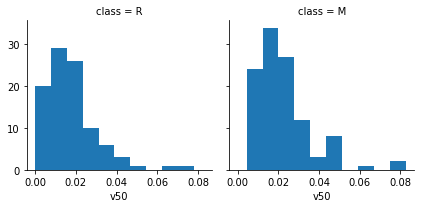

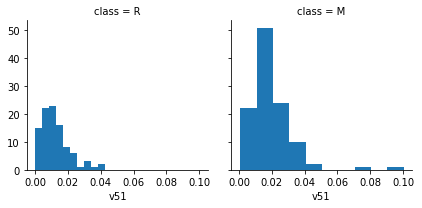

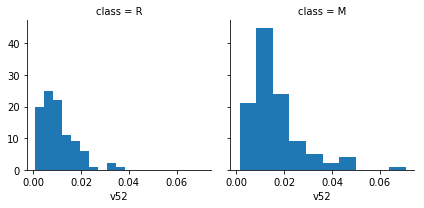

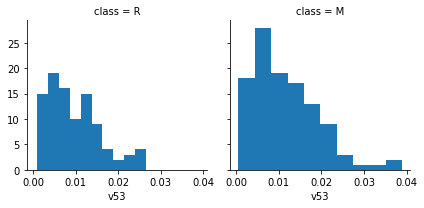

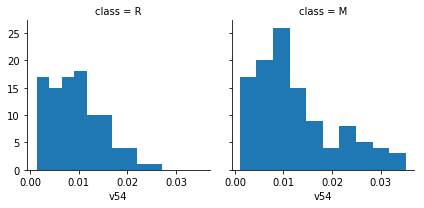

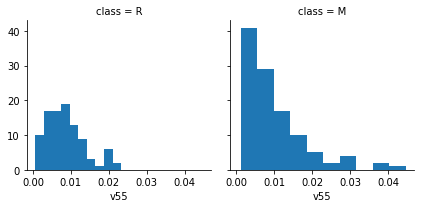

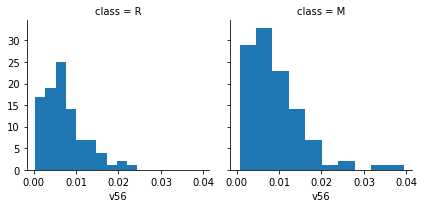

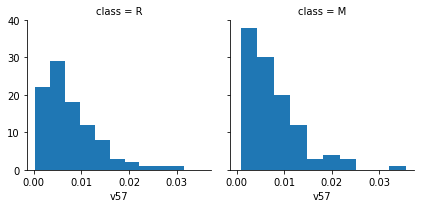

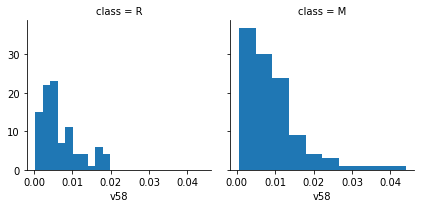

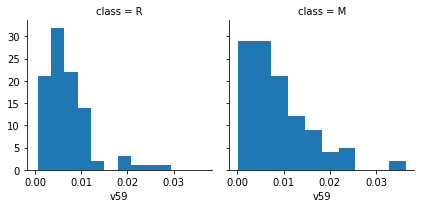

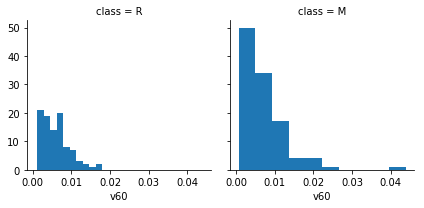

In [31]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    grid = sns.FacetGrid(df, col = 'class')
    grid.map(plt.hist, feature, bins = 10)    

### 산점도 매트릭스 파악

In [32]:
df.corr()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
v1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
v2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
v3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
v4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
v5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
v6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
v7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
v8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
v9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
v10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


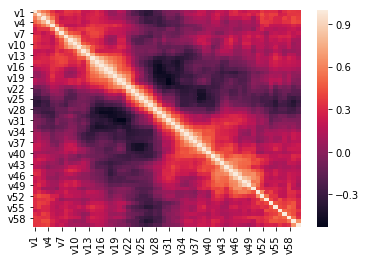

In [33]:
plt.figure()
ht = sns.heatmap(df.corr())

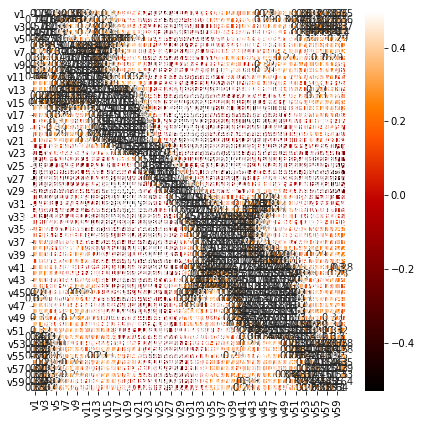

In [34]:
plt.figure(figsize = (7, 7))
ht = sns.heatmap(df.corr(), vmax = 0.5, cmap = plt.cm.gist_heat, linewidth = 0.1, linecolor = 'white', annot = True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


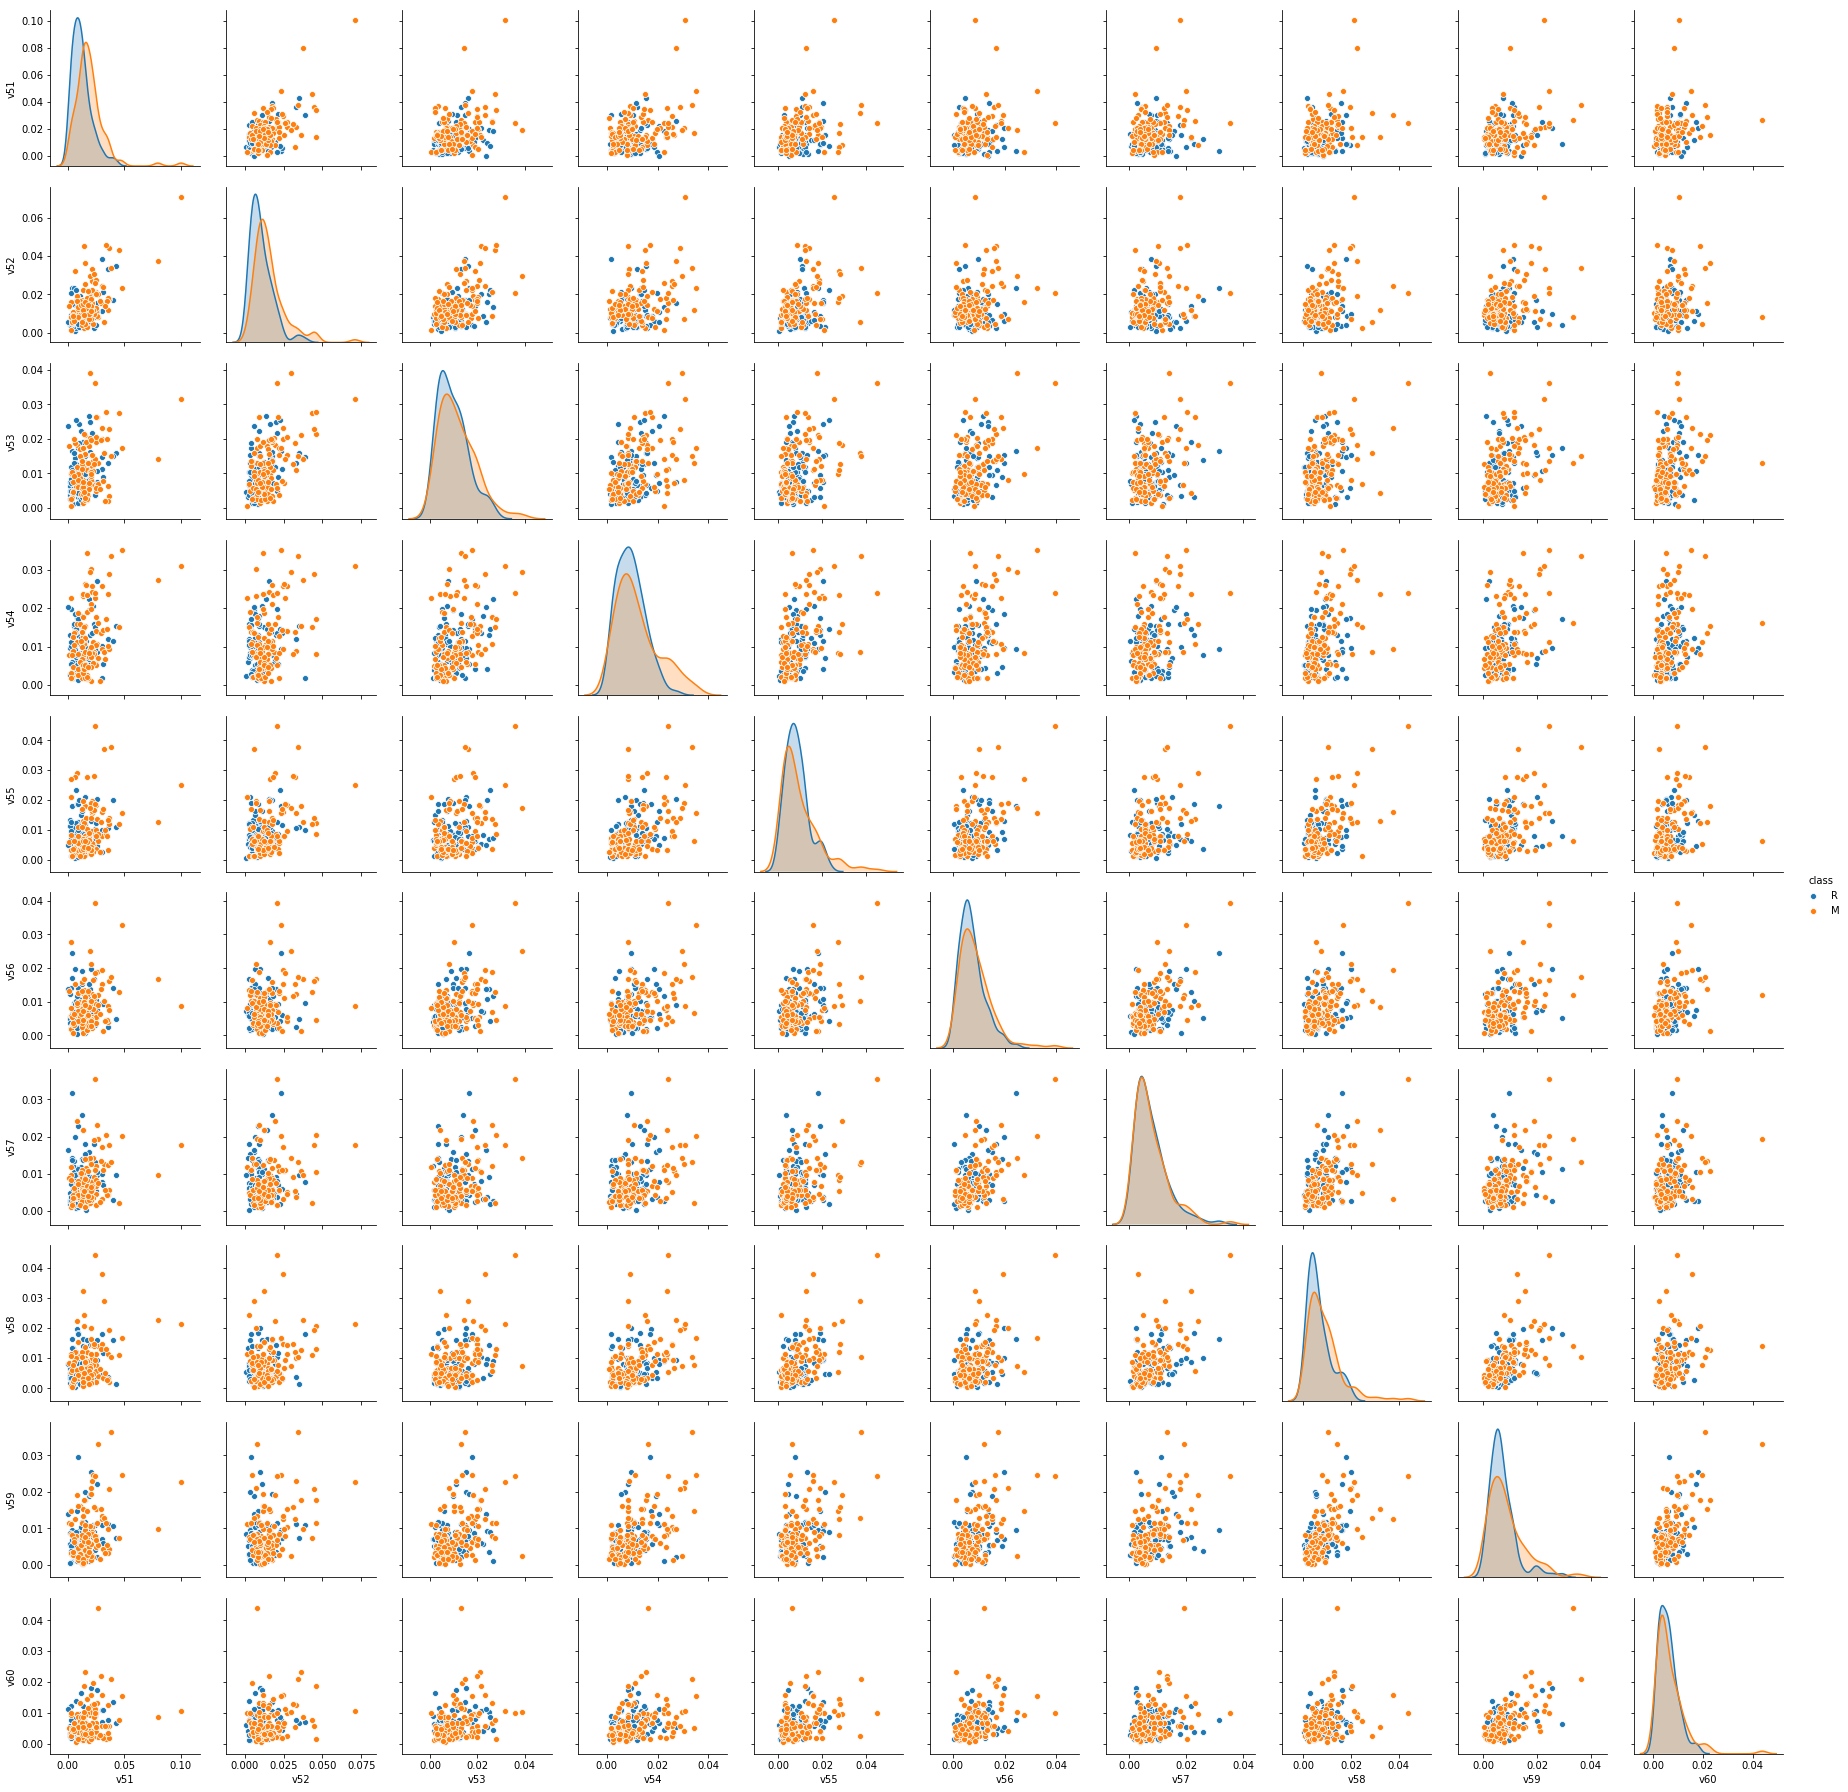

In [35]:
pp = sns.pairplot(df.iloc[:, 50:61], hue = 'class')

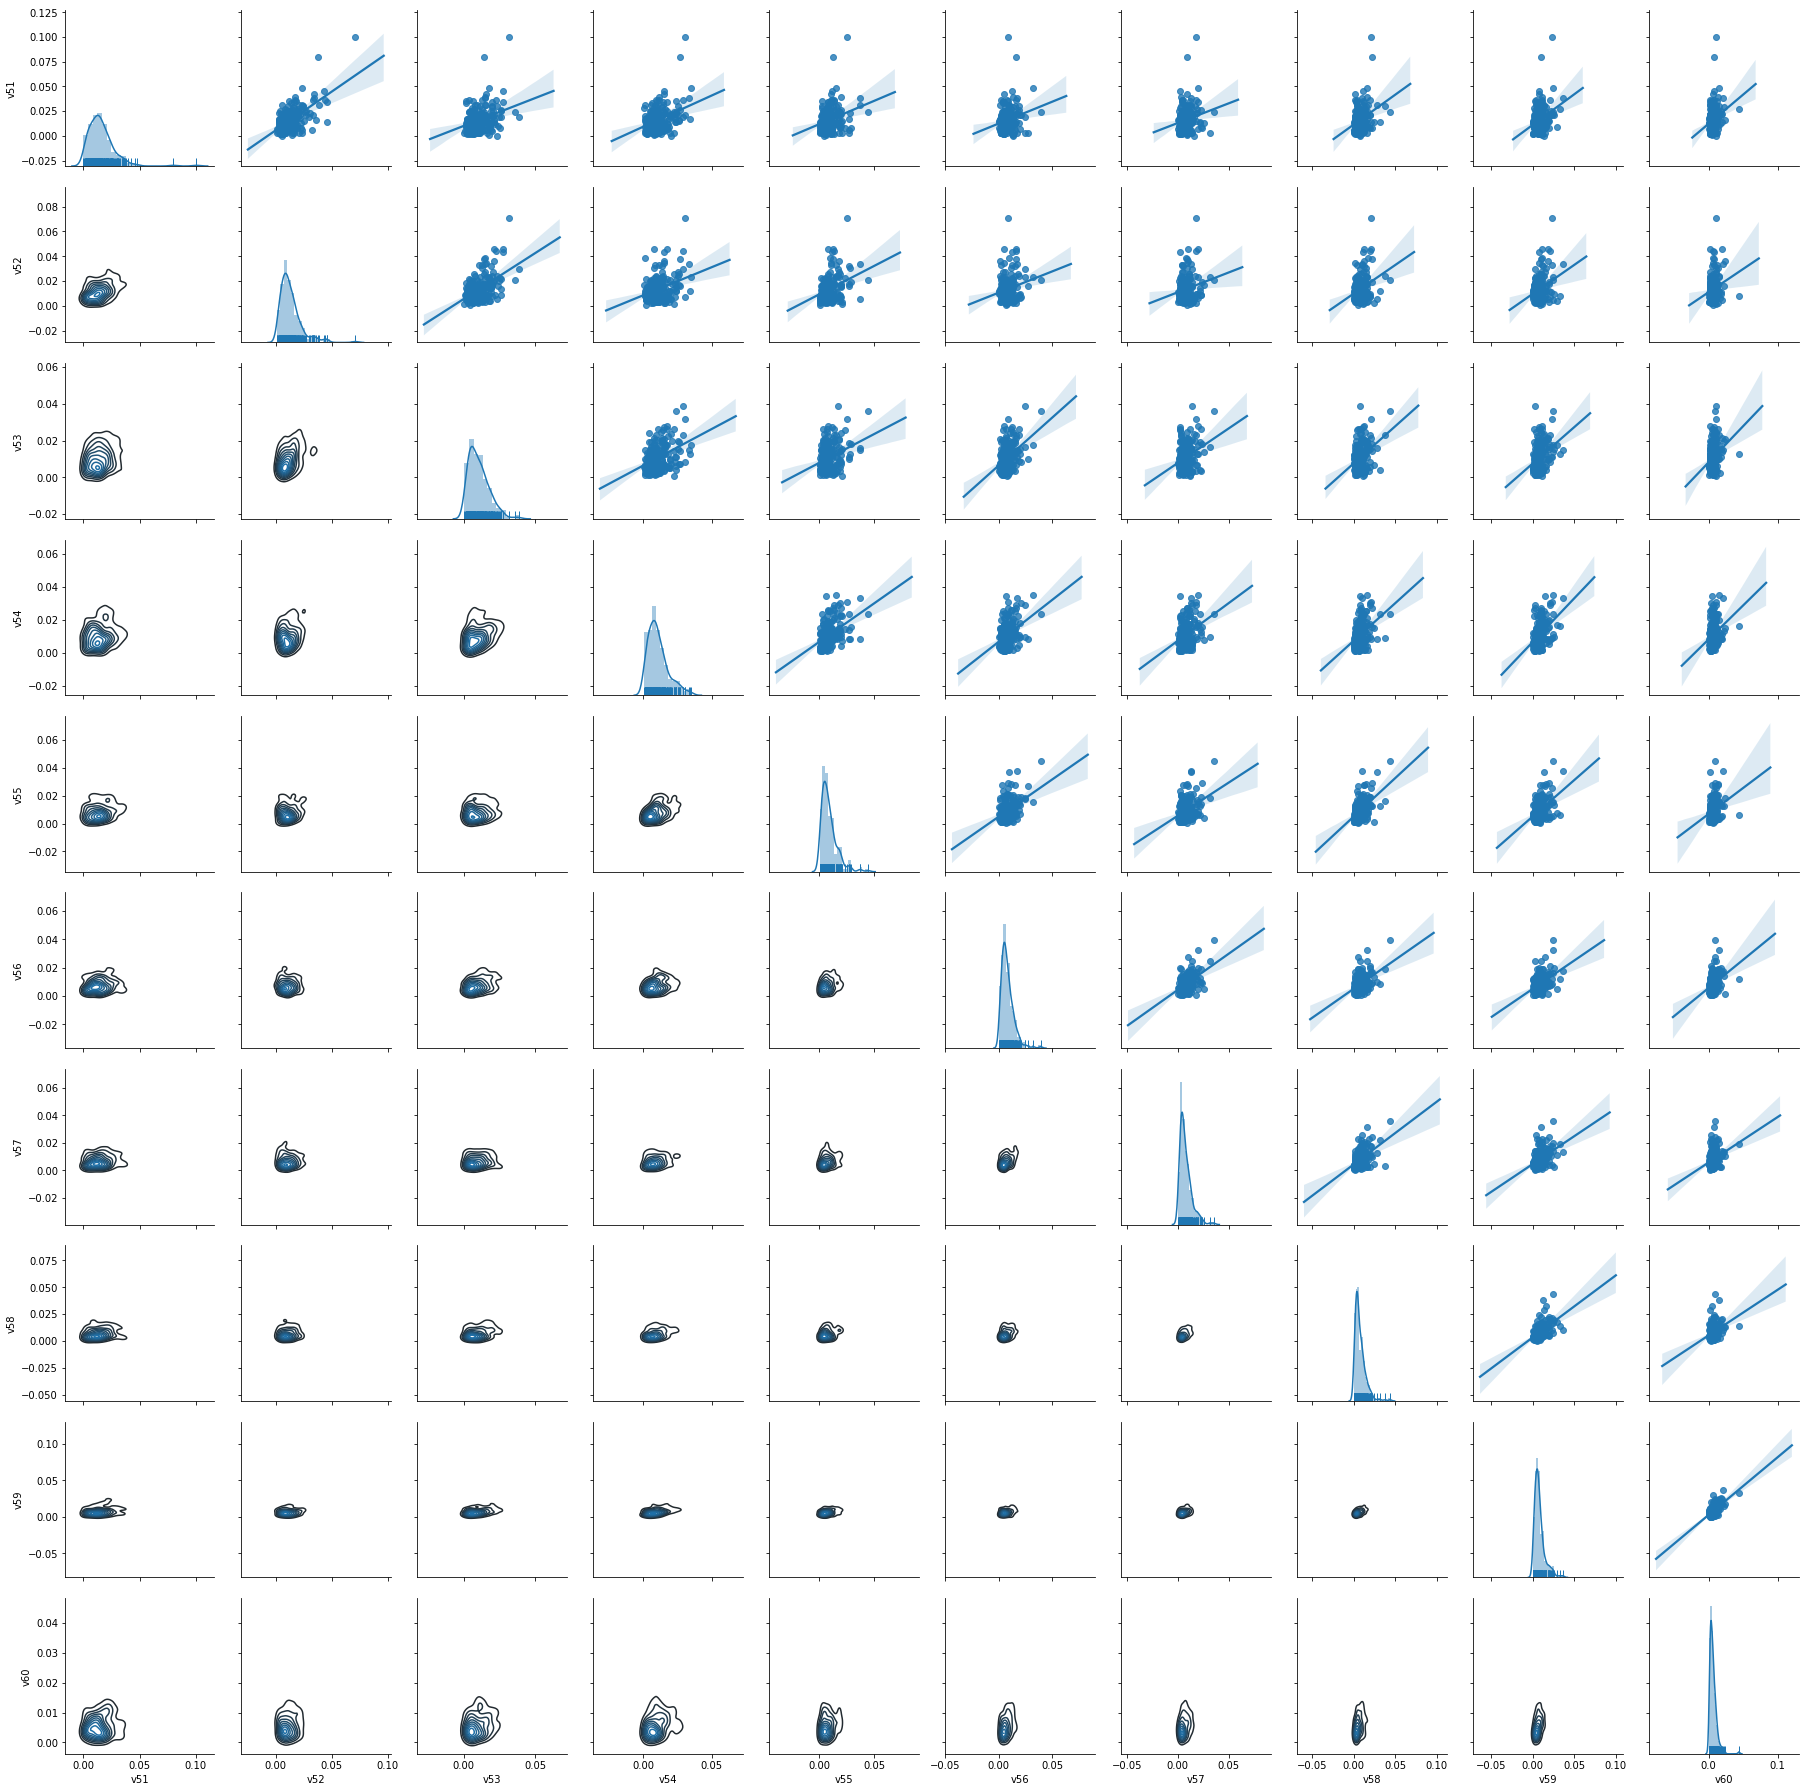

In [36]:
pair_grid = sns.PairGrid(df.iloc[:, 50:61]) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug = True) 

# <font color = 'blue'>피처변수셋과 타겟변수 준비</font>

In [37]:
# 변수컬럼명 간단확인
df.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


### pandas 데이터프레임 & 시리즈 객체형식으로 준비

In [38]:
# 피처(입력/예측/독립)변수 데이터셋 추출
X = df.iloc[:, 0:60]
print(type(X), X.shape)
X.head(3)

<class 'pandas.core.frame.DataFrame'> (208, 60)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078


In [39]:
# 타겟(출력/반응/종속)변수 데이터 추출
# - 데이터 형식이 문자열(obj)타입임
y = df.iloc[:, 60]
print(type(y), y.shape)
y.head(3)

<class 'pandas.core.series.Series'> (208,)


0    R
1    R
2    R
Name: class, dtype: object

### numpy 다차원 객체형식으로 준비

In [40]:
# 피처(입력/예측/독립)변수 데이터셋 추출
X_arr = df.values[:, 0:60]
print(type(X_arr), X_arr.shape)
X_arr[0:3]

<class 'numpy.ndarray'> (208, 60)


array([[0.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601,
        0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066, 0.2273,
        0.31, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555,
        0.6711, 0.6415, 0.7104, 0.808, 0.6791, 0.3857, 0.1307, 0.2604,
        0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
        0.051, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343,
        0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167,
        0.018, 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481,
        0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444,
        1.0, 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914,
        0.325, 0.32, 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947,
        0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.184, 0.197,
        0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.053, 0.0742,
        0.0409, 0.0061, 0.0125, 0.0084, 0.

In [41]:
# 타겟(출력/반응/종속)변수 데이터 추출
# - 데이터 형식이 문자열(obj)타입임
y_arr = df.values[:, 60]
print(type(y_arr), y_arr.shape)
y_arr[0:10]

<class 'numpy.ndarray'> (208,)


array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], dtype=object)

### 타겟변수 클래스별 빈도와 비율 분포

In [42]:
# pandas DataFrame에서 타겟 변수컬럼 인덱싱해서 확인
print('클래스 레이블:', pd.unique(df['class']))
print('클래스 빈도수:\n', pd.value_counts(df['class']))
print()

print('클래스 레이블:', df['class'].unique())
print('클래스 빈도수:\n', df['class'].value_counts())
print()

# pandas DataFrame에서 타겟변수 별도추출한 시리즈 객체로 확인
print('클래스 레이블:', pd.unique(y))
print('클래스 빈도수:\n', pd.value_counts(y))
print()

print('클래스 레이블:', y.unique())
print('클래스 빈도수:\n', y.value_counts())

클래스 레이블: ['R' 'M']
클래스 빈도수:
 M    111
R     97
Name: class, dtype: int64

클래스 레이블: ['R' 'M']
클래스 빈도수:
 M    111
R     97
Name: class, dtype: int64

클래스 레이블: ['R' 'M']
클래스 빈도수:
 M    111
R     97
Name: class, dtype: int64

클래스 레이블: ['R' 'M']
클래스 빈도수:
 M    111
R     97
Name: class, dtype: int64


In [43]:
target_labelcount = {k: v for k, v in zip(y.unique(), y.value_counts())}
target_labelcount
# - 클래스 유형별 빈도수 같이 출력

{'R': 111, 'M': 97}

In [44]:
print(type(target_labelcount))
print(target_labelcount.keys())
print(target_labelcount.values())
print(target_labelcount.items())
print()

for k, v in target_labelcount.items(): 
    pct = v / sum(target_labelcount.values()) 
    print(f"레이블: {k}, 빈도수: {v}, 비율: {pct:0.3f}") 

<class 'dict'>
dict_keys(['R', 'M'])
dict_values([111, 97])
dict_items([('R', 111), ('M', 97)])

레이블: R, 빈도수: 111, 비율: 0.534
레이블: M, 빈도수: 97, 비율: 0.466


### 타겟변수 문자열 레이블 숫자변환
* 타겟변수가 문자열인 경우 숫자로 변경해야 딥러닝 연산이 가능해짐

#### pandas .map() 메서드 이용

In [45]:
# pandas .map() 메서드 이용 레이블 변경
df['class_num'] = y.map({'R':0, 'M':1})
df['class_num'] = df['class_num'].astype('int')
df.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v53,v54,v55,v56,v57,v58,v59,v60,class,class_num
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0


In [46]:
# numpy이용 반응(종속)변수 클래스별 빈도수 도출
print('클래스 레이블:', np.unique(df['class_num']))
print('클래스 빈도수:', np.bincount(df['class_num']))
df['class_num'].values

클래스 레이블: [0 1]
클래스 빈도수: [ 97 111]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### sklearn .LabelEncoder() 메서드 이용

In [47]:
# sklearn LabelEncoder() 메서드 이용 레이블을 숫자로 변경함
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() # 객체 모델 encoder로 받고

species_le = encoder.fit(df['class']) #df['class']를 인코딩 fit하는 법
species_le.classes_

y_num = species_le.transform(df['class'])
y_num

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [48]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

Using TensorFlow backend.


### 랜덤 시드넘버 설정

In [49]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 모델 훈련계층 설정

In [50]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - Dense() 객체로 학습계층별로 여러 개 노드가 밀집된 신경망을 구현함
# - 입력층(60개노드)-은닉층(24개노드)-은닉층(10개노드)-출력층(1개노드)

# 입력층(24개노드) + 은닉층(60개노드)
md.add(Dense(24, input_dim = 60, activation = 'relu'))
# - 딥러닝 학습계층 1번째로 input_dim 으로 입력층 + 은닉층 역할 수행
# - input_dim은 피처셋의 예측(입력;독립)변수 갯수로 입력층에 60개 노드로 지정
#   첫번째 레이어 이후로는 입력개수 지정 불필요
#   앞 레이어의 출력갯수가 이후 뒤 레이어의 입력개수가 됨
# - Dense 함수로 은닉층에 24개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

# 은닉층(10개노드)
md.add(Dense(10, activation = 'relu'))
# - 딥러닝 학습계층 2번째로 은닉층 역할 수행
# - Dense 함수로 은닉층에 10개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

# 출력층(1개노드)
md.add(Dense(1, activation = 'sigmoid'))
# - 딥러닝 학습계층 3번째로 출력층 역할
# - 출력값을 1개로 정해서 보여주기 위해서 1개 노드로 설정함
# - activation = 'sigmoid'로 활성화함수 지정해 
#   최종적인 출력값을 0 또는 1의 확률값으로 도출

### 모델 훈련방법 설정

In [51]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'binary_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 모델 훈련실시

In [52]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

md.fit(X, y_num, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈런셋 정확도, 
#   ETA:estimated time of arrival
#   step: Weight와 Bias를 1회 업데이트하는 단위작업

Epoch 1/200
208/208 [==============================] - 0s 2ms/step - loss: 0.7037 - acc: 0.4183
Epoch 2/200
208/208 [==============================] - 0s 105us/step - loss: 0.6892 - acc: 0.5288
Epoch 3/200
208/208 [==============================] - 0s 96us/step - loss: 0.6806 - acc: 0.5529
Epoch 4/200
208/208 [==============================] - 0s 120us/step - loss: 0.6757 - acc: 0.5625
Epoch 5/200
208/208 [==============================] - 0s 105us/step - loss: 0.6676 - acc: 0.5385
Epoch 6/200
208/208 [==============================] - 0s 101us/step - loss: 0.6566 - acc: 0.5577
Epoch 7/200
208/208 [==============================] - 0s 101us/step - loss: 0.6444 - acc: 0.5817
Epoch 8/200
208/208 [==============================] - 0s 101us/step - loss: 0.6320 - acc: 0.6490
Epoch 9/200
208/208 [==============================] - 0s 120us/step - loss: 0.6118 - acc: 0.6779
Epoch 10/200
208/208 [==============================] - 0s 139us/step - loss: 0.5941 - acc: 0.7115
Epoch 11/200
208/208 [

208/208 [==============================] - 0s 101us/step - loss: 0.0866 - acc: 0.9856
Epoch 165/200
208/208 [==============================] - 0s 110us/step - loss: 0.0875 - acc: 0.9808
Epoch 166/200
208/208 [==============================] - 0s 115us/step - loss: 0.0822 - acc: 0.9904
Epoch 167/200
208/208 [==============================] - 0s 105us/step - loss: 0.1012 - acc: 0.9663
Epoch 168/200
208/208 [==============================] - 0s 101us/step - loss: 0.0863 - acc: 0.9856
Epoch 169/200
208/208 [==============================] - 0s 96us/step - loss: 0.0847 - acc: 0.9904
Epoch 170/200
208/208 [==============================] - 0s 110us/step - loss: 0.0821 - acc: 0.9904
Epoch 171/200
208/208 [==============================] - 0s 115us/step - loss: 0.0844 - acc: 0.9808
Epoch 172/200
208/208 [==============================] - 0s 101us/step - loss: 0.0814 - acc: 0.9808
Epoch 173/200
208/208 [==============================] - 0s 96us/step - loss: 0.0770 - acc: 0.9904
Epoch 174/200
20

### 모델 성능평가

In [113]:
md_perf = md.evaluate(X, y_num)
md_perf_loss = md_perf[0]
md_perf_acc = md_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md_perf[1]:0.3f}')

208/208 [==============================] - 0s 38us/step
모델성능 종합: [0.049, 0.995]
모델성능 오차(loss):       0.049
모델성능 정확도(accuracy): 0.995


In [54]:
# y예측치 도출
md_y_pred = md.predict_classes(X)
md_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [55]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_num, md_y_pred)
cm

array([[111,   0],
       [  1,  96]], dtype=int64)

In [57]:
# 혼동표 성능분석
print(classification_report(y_num, md_y_pred,
                            target_names=['Rock', 'Metal']))

              precision    recall  f1-score   support

        Rock       0.99      1.00      1.00       111
       Metal       1.00      0.99      0.99        97

   micro avg       1.00      1.00      1.00       208
   macro avg       1.00      0.99      1.00       208
weighted avg       1.00      1.00      1.00       208



# <font color = 'blue'>데이터 분할을 이용한 딥러닝 모델링</font>

### 데이터 분할방법
* 전체데이터셋을 훈련셋과 테스트셋으로 분할해, 훈련셋으로 모델규칙을 도출함
* 테스트셋으로 훈련모델의 성능이 유지되는지 비교분석함

<img src = './../../images/train_test.png'>

### 데이터 분할 목적: 과적합 방지
* <font color = 'red'>과소적합(under-fitting)</font>: 훈련셋 정확도가 낮아 테스트셋 정확도도 같이 낮은 경우
<br> ==> 훈련모델을 예측모델로 사용하기 어려움
* <font color = 'red'>적정적합(generalized-fitting)</font>: 훈련셋의 정확도가 적정수준 이상이며, 
<br>테스트셋에서도 비슷한 수준의 정확도가 유지되는 경우
<br>==> 훈련모델의 일반화 가능성이 확보됨 
* <font color = 'red'>과대적합(over-fitting)</font>: 훈련셋 정확도는 높지만 테스트셋 정확도는 낮은 경우
<br> ==> 훈련모델의 일반화 가능성이 낮음
<img src = './../../images/overfitting.png'>

### 편향-분산 상충관계(bias-variance tradeoff) 고려
* <font color = 'red'>편향(bias)</font>: 예측모델의 예측값과 실제값이 얼마나 차이가 나는지 고려
* <font color = 'red'>분산(variance)</font>: 예측모델의 안전성이 데이터셋에 따라 얼마나 변동성이 있는지 고려
* <font color = 'red'>모델의 복잡도(model complexity)</font>: 피처갯수가 점점 많아지고, 개별 레코드의 피처특성을 일일이 고려하는 예측모델일수록 
<br>모델의 복잡도가 크며, 훈련모델에 대한 과적합가능성이 커짐
<img src = './../../images/bias_variance_tradeoff.png'>
* 훈련모델을 복잡하게 만들어 훈련셋에 대한 예측력(정확도)을 높이고 에러를 낮추게 되면, 
<br>과대적합으로 인해 테스트셋에 대한 검증시 예측력이 훈련셋과 비교해 비슷할 수도/낮아질 수도 있는 변동성이 커지게 됨
* 훈련모델을 단순하게 만들어 훈련셋에 대한 예측력(정확도)을 확보하지 못해 에러가 크게 발생하게 되는데, 
<br>이런 과소적합으로 인해 테스트셋에 대한 검증시에도 낮은 예측력 수준을 보여 변동성은 낮게 나타남
* 따라서 적정한 모델의 복잡도로 훈련모델을 설정해 훈련셋에 대한 예측력(정확도)와 에러정도를 적정수준으로 해야, 
<br>해당 예측모델을 테스트셋으로 검증할 때에도 비숫한 수준의 예측력(정확도)와 에러가 나타나게 됨

## (1) 훈련셋(train)으로 예측모델 도출 이후, 테스트셋(test)으로  예측모델 검증
* 전체 데이터셋중 훈련셋 70%만을 이용해 파라미터를 최적화한 예측모델을 우선 도출함
* 도출된 예측모델의 성능을 검증하기 위해서 나머지 테스트셋 30%를 입력해 과적합 여부를 판단함
* 훈련셋만을 model.fit()에 피팅해 예측모델을 우선 도출함 
<br>==> 테스트셋을 별도로 model.evaluate()에 입력해 예측모델의 과적합 여부를 판단함

### 타겟변수 클래스별 빈도와 비율 분포체크
* 타겟(출력/반응/종속)변수의 클래스 레이블의 분포가 균등한지를 사전에 체크함

In [58]:
# 데이터셋 변수컬럼 간단조회
df.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v53,v54,v55,v56,v57,v58,v59,v60,class,class_num
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0


In [59]:
# numpy이용 반응(종속)변수 클래스별 빈도수 도출
import numpy as np
print('클래스 레이블:', np.unique(df['class']))
print('클래스 레이블:', np.unique(df['class_num']))
print('클래스 빈도수:', np.bincount(df['class_num']))
print('클래스 비율:', [round(i / sum(np.bincount(df['class_num'])), 3) for i in np.bincount(df['class_num'])])

# - Red와인 품종이 White와인에 비해 상대적으로 클래스 분포비율이 큼

클래스 레이블: ['M' 'R']
클래스 레이블: [0 1]
클래스 빈도수: [ 97 111]
클래스 비율: [0.466, 0.534]


In [60]:
# pandas & dictionanry이용 반응(종속)변수 클래스별 빈도수 도출
target_labelcount = {k: v for k, v in zip(y.unique(), y.value_counts())}
for k, v in target_labelcount.items(): 
    pct = v / sum(target_labelcount.values()) 
    print(f"레이블: {k}, 빈도수: {v}, 비율: {pct:0.3f}") 

레이블: R, 빈도수: 111, 비율: 0.534
레이블: M, 빈도수: 97, 비율: 0.466


### 데이터 분할 실시

In [61]:
# 데이터분할 라이브러리 로딩
from sklearn.model_selection import train_test_split

In [62]:
# 데이터 분할 실시
X_train, X_test, y_train, y_test = train_test_split(
    X, y_num, test_size = 0.3, stratify = y, random_state = myseed)
# - 분할된 데이터셋을 각각의 객체에 별도로 저장해 놓음
# - 클래스가 불균형 상태이므로 데이터분할시 이 비율이 유지되도록 stratify = class_number으로 설정하는 것이 필요함
# - 훈련데이터이든 테스트데이터이든 이 반응(종속)변수의 클래스 비율이 같도록 샘플링이 되도록 하는 옵션임

# - train_test_split() 메서드는 Numpy 배열형식의 4개 반환값을 생성함
# - 기본적으로 train은 75%, test는 25% 데이터셋을 할당받는데,
#   test_size 매개변수를 통해 테스트셋의 비율을 0.3(30%)로 조정함
# - random.state 매개변수를 통해 샘플의 재현성을 확보함

In [63]:
# 데이터셋별 객체유형과 규모

# 피처 데이터셋
print('피처(입력/예측/독립)변수 전체 데이터셋 객체유형과 규모:', type(X), X.shape)
print('피처(입력/예측/독립)변수의 훈련용 데이터셋 객체유형과 규모:', type(X_train), X_train.shape)
print('피처(입력/예측/독립)변수의 테스트용 데이터셋 객체유형과 규모 :', type(X_test), X_test.shape)
print()

# 타겟 데이터셋
print('타깃(출력/반응/종속)변수 전체 데이터셋 객체유형과 규모:', type(y), y.shape)
print('타깃(출력/반응/종속)변수의 훈련용 데이터셋 객체유형과 규모:', type(y_train), y_train.shape)
print('타깃(출력/반응/종속)변수의 테스트용 데이터셋 객체유형과 규모 :', type(y_test), y_test.shape)

피처(입력/예측/독립)변수 전체 데이터셋 객체유형과 규모: <class 'pandas.core.frame.DataFrame'> (208, 60)
피처(입력/예측/독립)변수의 훈련용 데이터셋 객체유형과 규모: <class 'pandas.core.frame.DataFrame'> (145, 60)
피처(입력/예측/독립)변수의 테스트용 데이터셋 객체유형과 규모 : <class 'pandas.core.frame.DataFrame'> (63, 60)

타깃(출력/반응/종속)변수 전체 데이터셋 객체유형과 규모: <class 'pandas.core.series.Series'> (208,)
타깃(출력/반응/종속)변수의 훈련용 데이터셋 객체유형과 규모: <class 'numpy.ndarray'> (145,)
타깃(출력/반응/종속)변수의 테스트용 데이터셋 객체유형과 규모 : <class 'numpy.ndarray'> (63,)


### 딥러닝 모델 설정

#### 랜덤 시드넘버 설정

In [64]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### 모델 훈련계층 설정

In [65]:
# 딥러닝 학습계층 시퀀스객체 로딩
md2 = Sequential()

# 딥러닝 학습계층 설계
# - 입력층(60개노드)-은닉층(24개노드)-은닉층(10개노드)-출력층(1개노드)

md2.add(Dense(24, input_dim = 60, activation = 'relu'))
md2.add(Dense(10, activation = 'relu'))
md2.add(Dense(1, activation = 'sigmoid'))

#### 모델 훈련방법 설정

In [66]:
# 준비된 학습계층의 학습방법 설정
md2.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

#### 모델 훈련실시

In [67]:
# 딥러닝 모델 최적화 훈련진행

md2.fit(X_train, y_train, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

Epoch 1/200
145/145 [==============================] - 0s 3ms/step - loss: 0.7090 - acc: 0.3724
Epoch 2/200
145/145 [==============================] - 0s 117us/step - loss: 0.6937 - acc: 0.5103
Epoch 3/200
145/145 [==============================] - 0s 117us/step - loss: 0.6883 - acc: 0.5517
Epoch 4/200
145/145 [==============================] - 0s 131us/step - loss: 0.6842 - acc: 0.5448
Epoch 5/200
145/145 [==============================] - 0s 117us/step - loss: 0.6806 - acc: 0.5379
Epoch 6/200
145/145 [==============================] - 0s 144us/step - loss: 0.6776 - acc: 0.5379
Epoch 7/200
145/145 [==============================] - 0s 131us/step - loss: 0.6734 - acc: 0.5448
Epoch 8/200
145/145 [==============================] - 0s 124us/step - loss: 0.6678 - acc: 0.5517
Epoch 9/200
145/145 [==============================] - 0s 103us/step - loss: 0.6631 - acc: 0.5448
Epoch 10/200
145/145 [==============================] - 0s 110us/step - loss: 0.6541 - acc: 0.5517
Epoch 11/200
145/145 

145/145 [==============================] - 0s 117us/step - loss: 0.0946 - acc: 0.9793
Epoch 165/200
145/145 [==============================] - 0s 124us/step - loss: 0.0938 - acc: 0.9793
Epoch 166/200
145/145 [==============================] - 0s 124us/step - loss: 0.0923 - acc: 0.9793
Epoch 167/200
145/145 [==============================] - 0s 131us/step - loss: 0.0935 - acc: 0.9793
Epoch 168/200
145/145 [==============================] - 0s 103us/step - loss: 0.0928 - acc: 0.9793
Epoch 169/200
145/145 [==============================] - 0s 124us/step - loss: 0.0913 - acc: 0.9862
Epoch 170/200
145/145 [==============================] - 0s 151us/step - loss: 0.0853 - acc: 0.9793
Epoch 171/200
145/145 [==============================] - 0s 131us/step - loss: 0.0884 - acc: 0.9793
Epoch 172/200
145/145 [==============================] - 0s 117us/step - loss: 0.0838 - acc: 0.9793
Epoch 173/200
145/145 [==============================] - 0s 124us/step - loss: 0.0834 - acc: 0.9862
Epoch 174/200


#### 모델 성능평가

In [68]:
md2_train_perf = md2.evaluate(X_train, y_train)
md2_train_loss = md2_train_perf[0]
md2_train_acc = md2_train_perf[1]

print('훈련모델성능 종합:', [round(i, 3) for i in md2_train_perf])
print(f'훈련모델성능 오차(loss): {md2_train_loss:0.3f}')
print(f'훈련모델성능 정확도(accuracy): {md2_train_acc:0.3f}')

145/145 [==============================] - 0s 378us/step
훈련모델성능 종합: [0.046, 0.993]
훈련모델성능 오차(loss): 0.046
훈련모델성능 정확도(accuracy): 0.993


### 훈련모델에 테스트셋 피팅

In [69]:
md2_test_perf = md2.evaluate(X_test, y_test)
md2_test_loss = md2_test_perf[0]
md2_test_acc = md2_test_perf[1]

print('테스트셋 성능종합:', [round(i, 3) for i in md2_test_perf])
print(f'테스트셋 오차(loss): {md2_test_loss:0.3f}')
print(f'테스트셋 정확도(accuracy): {md2_test_acc:0.3f}')

63/63 [==============================] - 0s 79us/step
테스트셋 성능종합: [0.518, 0.857]
테스트셋 오차(loss): 0.518
테스트셋 정확도(accuracy): 0.857


### 훈련셋과 테스트셋 성능평가 비교

In [70]:
print(f'[모델별 오차(loss)] 훈련셋:{md2_train_loss:0.3f}, 테스트셋:{md2_test_loss:0.3f}, ==>차이:{md2_test_loss - md2_train_loss:0.3f}')

[모델별 오차(loss)] 훈련셋:0.046, 테스트셋:0.518, ==>차이:0.472


In [71]:
print(f'[모델별 정확도(accuracy)] 훈련셋:{md2_train_acc:0.3f}, 테스트셋:{md2_test_acc:0.3f}, ==>차이:{md2_test_acc - md2_train_acc:0.3f}')

[모델별 정확도(accuracy)] 훈련셋:0.993, 테스트셋:0.857, ==>차이:-0.136


## (2) 훈련셋(train) 학습시 테스트셋(test)을 검증셋(valid)으로 같이 입력해 예측모델 도출
* 전체 데이터셋중 훈련셋 70%를 이용해 예측모델의 파라미터를 조율해나갈 때, 
<br> 동시에 테스트셋 30%를 검증셋(validation)으로 입력하여, 훈련셋으로 조율해나가는 예측모델의 정확도를 바로 검증하는 방법
* 훈련셋 70%와 테스트셋 30%를 동시에 model.fit()에 입력해 에포크가 1회씩 진행될 때마다
<br> 훈련셋으로 파라미터를 조율하고, 이 조율된 파라미터의 예측력이 적정한지를 같이 투입된 테스트셋을 바로 검증함
<br> ==> 테스트셋을 별도로 model.evaluate()에 입력해 예측모델의 과적합 여부를 판단함

### 딥러닝 모델 설정

#### 랜덤 시드넘버 설정

In [72]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### 모델 훈련계층 설정

In [73]:
# 딥러닝 학습계층 시퀀스객체 로딩
md3 = Sequential()

# 딥러닝 학습계층 설계
# - 입력층(60개노드)-은닉층(24개노드)-은닉층(10개노드)-출력층(1개노드)

md3.add(Dense(24, input_dim = 60, activation = 'relu'))
md3.add(Dense(10, activation = 'relu'))
md3.add(Dense(1, activation = 'sigmoid'))

#### 모델 훈련방법 설정

In [74]:
# 준비된 학습계층의 학습방법 설정
md3.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

#### 모델 훈련실시

In [75]:
# 딥러닝 모델 최적화 훈련진행
md3.fit(X_train, y_train, validation_data=(X_test, y_test), 
        batch_size = 10, epochs = 200)
# - 전체데이터셋이 아닌 분할된 훈련셋(X_train, y_train)을 이용해 모델에 피팅함
# - 테스트데이터도 같이 입력해 훈련셋 학습을 통해 도출되는 조율된 파라미터들이 적정한지를 
#   테스트데이터를 통해 바로 체크하면서 파라미터를 최적화해나감
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함
# - 1회 에포크 배치작업당 부분 샘플셋들을 모두 활용해 학습을 진행해 나가면서 
#   파라미터(가중치와 편의)를 조율해 예측오차를 최소화하고 정확도를 높임

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈련셋 정확도, 
#   val_loss:검증셋 오차, val_acc:검증셋 정확도, 
# - ETA:estimated time of arrival

Train on 145 samples, validate on 63 samples
Epoch 1/200
145/145 [==============================] - 0s 3ms/step - loss: 0.7088 - acc: 0.3724 - val_loss: 0.6978 - val_acc: 0.3810
Epoch 2/200
145/145 [==============================] - 0s 124us/step - loss: 0.6937 - acc: 0.5034 - val_loss: 0.6896 - val_acc: 0.5714
Epoch 3/200
145/145 [==============================] - 0s 158us/step - loss: 0.6883 - acc: 0.5448 - val_loss: 0.6843 - val_acc: 0.5238
Epoch 4/200
145/145 [==============================] - 0s 206us/step - loss: 0.6843 - acc: 0.5448 - val_loss: 0.6778 - val_acc: 0.5397
Epoch 5/200
145/145 [==============================] - 0s 144us/step - loss: 0.6812 - acc: 0.5379 - val_loss: 0.6740 - val_acc: 0.5397
Epoch 6/200
145/145 [==============================] - 0s 131us/step - loss: 0.6778 - acc: 0.5379 - val_loss: 0.6695 - val_acc: 0.5397
Epoch 7/200
145/145 [==============================] - 0s 138us/step - loss: 0.6733 - acc: 0.5379 - val_loss: 0.6634 - val_acc: 0.5397
Epoch 8/200


Epoch 61/200
145/145 [==============================] - 0s 151us/step - loss: 0.3149 - acc: 0.8966 - val_loss: 0.3774 - val_acc: 0.8254
Epoch 62/200
145/145 [==============================] - 0s 179us/step - loss: 0.3139 - acc: 0.9034 - val_loss: 0.3796 - val_acc: 0.8413
Epoch 63/200
145/145 [==============================] - 0s 138us/step - loss: 0.3096 - acc: 0.9103 - val_loss: 0.3804 - val_acc: 0.8254
Epoch 64/200
145/145 [==============================] - 0s 179us/step - loss: 0.3115 - acc: 0.8966 - val_loss: 0.3852 - val_acc: 0.8254
Epoch 65/200
145/145 [==============================] - 0s 151us/step - loss: 0.3031 - acc: 0.9103 - val_loss: 0.3795 - val_acc: 0.8254
Epoch 66/200
145/145 [==============================] - 0s 186us/step - loss: 0.2984 - acc: 0.8966 - val_loss: 0.3812 - val_acc: 0.8571
Epoch 67/200
145/145 [==============================] - 0s 158us/step - loss: 0.2953 - acc: 0.9034 - val_loss: 0.3851 - val_acc: 0.8413
Epoch 68/200
145/145 [==========================

145/145 [==============================] - 0s 172us/step - loss: 0.1755 - acc: 0.9655 - val_loss: 0.4206 - val_acc: 0.8254
Epoch 122/200
145/145 [==============================] - 0s 193us/step - loss: 0.1752 - acc: 0.9586 - val_loss: 0.4291 - val_acc: 0.8571
Epoch 123/200
145/145 [==============================] - 0s 193us/step - loss: 0.1715 - acc: 0.9724 - val_loss: 0.4324 - val_acc: 0.8254
Epoch 124/200
145/145 [==============================] - 0s 172us/step - loss: 0.1747 - acc: 0.9586 - val_loss: 0.4277 - val_acc: 0.8254
Epoch 125/200
145/145 [==============================] - 0s 186us/step - loss: 0.1729 - acc: 0.9517 - val_loss: 0.4298 - val_acc: 0.8571
Epoch 126/200
145/145 [==============================] - 0s 165us/step - loss: 0.1710 - acc: 0.9586 - val_loss: 0.4367 - val_acc: 0.8730
Epoch 127/200
145/145 [==============================] - 0s 213us/step - loss: 0.1665 - acc: 0.9655 - val_loss: 0.4284 - val_acc: 0.8095
Epoch 128/200
145/145 [==============================] 

#### 모델 성능평가

In [76]:
md3_train_perf = md3.evaluate(X_train, y_train)
md3_train_loss = md3_train_perf[0]
md3_train_acc = md3_train_perf[1]

print('훈련모델성능 종합:', [round(i, 3) for i in md3_train_perf])
print(f'훈련모델성능 오차(loss): {md3_train_loss:0.3f}')
print(f'훈련모델성능 정확도(accuracy): {md3_train_acc:0.3f}')

145/145 [==============================] - 0s 34us/step
훈련모델성능 종합: [0.083, 0.986]
훈련모델성능 오차(loss): 0.083
훈련모델성능 정확도(accuracy): 0.986


### 훈련모델에 테스트셋 피팅

In [77]:
md3_test_perf = md3.evaluate(X_test, y_test)
md3_test_loss = md3_test_perf[0]
md3_test_acc = md3_test_perf[1]

print('테스트셋 성능종합:', [round(i, 3) for i in md3_test_perf])
print(f'테스트셋 오차(loss): {md3_test_loss:0.3f}')
print(f'테스트셋 정확도(accuracy): {md3_test_acc:0.3f}')

63/63 [==============================] - 0s 47us/step
테스트셋 성능종합: [0.563, 0.825]
테스트셋 오차(loss): 0.563
테스트셋 정확도(accuracy): 0.825


### 훈련셋과 테스트셋 성능평가 비교

In [78]:
print(f'[모델별 오차(loss)] 훈련셋:{md3_train_loss:0.3f}, 테스트셋:{md3_test_loss:0.3f}, ==>차이:{md3_test_loss - md3_train_loss:0.3f}')

[모델별 오차(loss)] 훈련셋:0.083, 테스트셋:0.563, ==>차이:0.480


In [79]:
print(f'[모델별 정확도(accuracy)] 훈련셋:{md3_train_acc:0.3f}, 테스트셋:{md3_test_acc:0.3f}, ==>차이:{md3_test_acc - md3_train_acc:0.3f}')

[모델별 정확도(accuracy)] 훈련셋:0.986, 테스트셋:0.825, ==>차이:-0.161


## (3) 훈련셋(train) 일부를 검증셋(valid)으로 만들어 예측모델 도출하고, 테스트셋(test)으로 검증
* 훈련셋 70% 중의 일부를 검증셋(validation)으로 만들어 놓음 
* 훈련셋으로으로 예측모델의 파라미터를 조율해나갈 때, 동시에 검증셋을 활용해, 훈련셋으로 조율해 나가는 예측모델의 정확도를 바로 검증함 
* 훈련셋 70%와 테스트셋 30%를 동시에 model.fit()에 입력해 에포크가 1회씩 진행될 때마다 
<br>훈련셋으로 파라미터를 조율하고, 이 조율된 파라미터의 예측력이 적정한지를 검증셋으로 바로 검증함 
<br>==> 테스트셋을 별도로 model.evaluate()에 입력해 예측모델의 과적합 여부를 판단함

### 딥러닝 모델 설정

#### 랜덤 시드넘버 설정

In [80]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### 모델 훈련계층 설정

In [81]:
# 딥러닝 학습계층 시퀀스객체 로딩
md4 = Sequential()

# 딥러닝 학습계층 설계
# - 입력층(60개노드)-은닉층(24개노드)-은닉층(10개노드)-출력층(1개노드)

md4.add(Dense(24, input_dim = 60, activation = 'relu'))
md4.add(Dense(10, activation = 'relu'))
md4.add(Dense(1, activation = 'sigmoid'))

#### 모델 훈련방법 설정

In [82]:
# 준비된 학습계층의 학습방법 설정
md4.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

#### 모델 훈련실시

In [83]:
# 딥러닝 모델 최적화 훈련진행

md4.fit(X_train, y_train, validation_split= 0.2, 
        batch_size = 5, epochs = 130)
# - 전체데이터셋이 아닌 분할된 훈련셋(X_train, y_train)을 이용해 모델에 피팅함
# - 훈련셋중 일부데이터를 검증용(validation)세으로 만들어 
#   훈련셋 학습을 통해 도출되는 조율된 파라미터들이 적정한지를 
#   검증셋을 통해 바로 체크하면서 파라미터를 최적화해나감
# - 훈련셋을 5개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 130번 반복실시함
# - 1회 에포크 배치작업당 부분 샘플셋들을 모두 활용해 학습을 진행해 나가면서 
#   파라미터(가중치와 편의)를 조율해 예측오차를 최소화하고 정확도를 높임

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈련셋 정확도, 
#   val_loss:검증셋 오차, val_acc:검증셋 정확도, 
# - ETA:estimated time of arrival

Train on 116 samples, validate on 29 samples
Epoch 1/130
116/116 [==============================] - 0s 4ms/step - loss: 0.7055 - acc: 0.4397 - val_loss: 0.6987 - val_acc: 0.4138
Epoch 2/130
116/116 [==============================] - 0s 241us/step - loss: 0.6923 - acc: 0.5259 - val_loss: 0.6911 - val_acc: 0.5517
Epoch 3/130
116/116 [==============================] - 0s 249us/step - loss: 0.6865 - acc: 0.5776 - val_loss: 0.6888 - val_acc: 0.6207
Epoch 4/130
116/116 [==============================] - 0s 232us/step - loss: 0.6792 - acc: 0.5259 - val_loss: 0.6818 - val_acc: 0.5862
Epoch 5/130
116/116 [==============================] - 0s 241us/step - loss: 0.6713 - acc: 0.5259 - val_loss: 0.6755 - val_acc: 0.5862
Epoch 6/130
116/116 [==============================] - 0s 224us/step - loss: 0.6624 - acc: 0.5259 - val_loss: 0.6731 - val_acc: 0.6207
Epoch 7/130
116/116 [==============================] - 0s 215us/step - loss: 0.6569 - acc: 0.6897 - val_loss: 0.6687 - val_acc: 0.6207
Epoch 8/130


Epoch 61/130
116/116 [==============================] - 0s 258us/step - loss: 0.2494 - acc: 0.9397 - val_loss: 0.4690 - val_acc: 0.7931
Epoch 62/130
116/116 [==============================] - 0s 232us/step - loss: 0.2618 - acc: 0.9138 - val_loss: 0.4697 - val_acc: 0.7931
Epoch 63/130
116/116 [==============================] - 0s 232us/step - loss: 0.2450 - acc: 0.9310 - val_loss: 0.4684 - val_acc: 0.7931
Epoch 64/130
116/116 [==============================] - 0s 215us/step - loss: 0.2401 - acc: 0.9397 - val_loss: 0.4678 - val_acc: 0.7931
Epoch 65/130
116/116 [==============================] - 0s 224us/step - loss: 0.2637 - acc: 0.8966 - val_loss: 0.4699 - val_acc: 0.7931
Epoch 66/130
116/116 [==============================] - 0s 224us/step - loss: 0.2384 - acc: 0.9397 - val_loss: 0.4697 - val_acc: 0.8276
Epoch 67/130
116/116 [==============================] - 0s 224us/step - loss: 0.2357 - acc: 0.9224 - val_loss: 0.4780 - val_acc: 0.7586
Epoch 68/130
116/116 [==========================

#### 모델 성능평가

In [100]:
md4_train_perf = md4.evaluate(X_train, y_train)
md4_train_loss = md4_train_perf[0]
md4_train_acc = md4_train_perf[1]

print('훈련모델성능 종합:', [round(i, 3) for i in md4_train_perf])
print(f'훈련모델성능 오차(loss): {md4_train_loss:0.3f}')
print(f'훈련모델성능 정확도(accuracy): {md4_train_acc:0.3f}')

145/145 [==============================] - 0s 55us/step
훈련모델성능 종합: [0.185, 0.945]
훈련모델성능 오차(loss): 0.185
훈련모델성능 정확도(accuracy): 0.945


### 훈련모델에 테스트셋 피팅

In [85]:
md4_test_perf = md4.evaluate(X_test, y_test)
md4_test_loss = md4_test_perf[0]
md4_test_acc = md4_test_perf[1]

print('테스트셋 성능종합:', [round(i, 3) for i in md4_test_perf])
print(f'테스트셋 오차(loss): {md4_test_loss:0.3f}')
print(f'테스트셋 정확도(accuracy): {md4_test_acc:0.3f}')

63/63 [==============================] - 0s 47us/step
테스트셋 성능종합: [0.494, 0.841]
테스트셋 오차(loss): 0.494
테스트셋 정확도(accuracy): 0.841


### 훈련셋과 테스트셋 성능평가 비교

In [86]:
print(f'[모델별 오차(loss)] 훈련셋:{md4_train_loss:0.3f}, 테스트셋:{md4_test_loss:0.3f}, ==>차이:{md4_test_loss - md4_train_loss:0.3f}')

[모델별 오차(loss)] 훈련셋:0.185, 테스트셋:0.494, ==>차이:0.309


In [87]:
print(f'[모델별 정확도(accuracy)] 훈련셋:{md4_train_acc:0.3f}, 테스트셋:{md4_test_acc:0.3f}, ==>차이:{md4_test_acc - md4_train_acc:0.3f}')

[모델별 정확도(accuracy)] 훈련셋:0.945, 테스트셋:0.841, ==>차이:-0.104


# <font color = 'blue'>K겹 교차검증을 이용한 딥러닝 모델링</font>

### K겹 교차검증(K-Fold Cross-Validation)
* 전체 데이터셋을 k개의 균등한 크기의 부분집합(folds)으로 나누고, 이를 이용해 학습모델을 k개 반복해서 생성해 교차검증하는 기법
* 각 훈련모델은 k개 부분집합중 1개 폴드를 테스트 데이터셋으로, 나머지 폴드들을 훈련 데이터셋으로 활용함
<img src = './../../images/kfold.png'>

In [88]:
# 전체 데이터셋 간략조회
df.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v53,v54,v55,v56,v57,v58,v59,v60,class,class_num
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0


### 피처셋과 타겟변수 확인

In [101]:
# 피처(입력/예측/독립)변수 데이터셋 추출
X_df = df.iloc[:, 0:60]
print(type(X_df), X_df.shape)
print(X_df.head(3))

# pandas DataFrame 객체형식에서 Numpay 다차원 배열형태로 추출
X = df.iloc[:, 0:60].values
print(type(X), X.shape)
print(X)

<class 'pandas.core.frame.DataFrame'> (208, 60)
       v1      v2      v3      v4      v5      v6      v7      v8      v9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   

      v10   ...       v51     v52     v53     v54     v55     v56     v57  \
0  0.2111   ...    0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872   ...    0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194   ...    0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   

      v58     v59     v60  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.0164  0.0095  0.0078  

[3 rows x 60 columns]
<class 'numpy.ndarray'> (208, 60)
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.04

In [90]:
# 타겟(출력/반응/종속)변수 데이터 추출
y_df = df.iloc[:, 61]
print(type(y_df), y_df.shape)
print(y_df.head())
print()

# pandas Series 객체형식에서 Numpay 다차원 배열형태로 추출
y = df.iloc[:, 61].values
print(type(y), y.shape)
print(y)

<class 'pandas.core.series.Series'> (208,)
0    0
1    0
2    0
3    0
4    0
Name: class_num, dtype: int32

<class 'numpy.ndarray'> (208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### K겹 교차검증용 데이터 분할 설정

#### 랜덤 시드넘버 설정

In [91]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

In [92]:
# sklearn 라이브러리 model_selection 모듈에서 K겹 분할 메서드 로딩
from sklearn.model_selection import StratifiedKFold
# - KFold 메서드는 수치예측(regression) 모델링을 위한 분할
# - StratifiedKFold는 분류예측(classification) 모델링을 위한 분할
# - 레코드가 순서가 있을까봐 셔플을 돌림.

# K겹 갯수와 분할방식 설정
my_k = 10
skf = StratifiedKFold(n_splits = my_k, shuffle = True, random_state = myseed)
skf

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

### K겹 교차검증 딥러닝 훈련실시

In [93]:
# k겹 교차검증 훈련모델마다 모델성능 저장용 리스트객체 준비
k_train_loss = []
k_train_acc = []
k_test_loss = []
k_test_acc = []

# k겹 교차검증을 이용한 딥러닝 학습실시
# - k겹 교차겸증시에는 피처셋과 타겟변수를 
#   pandas DataFrame이나 Seires형식이 아닌
#   numpay 다차원배열 형식으로 투입해야함

for train, test in skf.split(X, y):
    md5 = Sequential()

    # 훈련모델 학습계층 설정
    md5.add(Dense(24, input_dim = 60, activation = 'relu'))
    md5.add(Dense(10, activation = 'relu'))
    md5.add(Dense(1, activation = 'sigmoid'))

    # 준비된 학습계층의 훈련방법 설정
    md5.compile(loss = 'binary_crossentropy', 
                optimizer = 'adam', metrics = ['accuracy'])

    # 딥러닝 학습계층모델에 훈련 데이터 피팅
    md5.fit(X[train], y[train], epochs = 200, batch_size = 10)

    # 훈련모델 성능평가
    train_loss = "%.3f" % (md5.evaluate(X[train], y[train])[0])
    train_acc = "%.3f" % (md5.evaluate(X[train], y[train])[1])
    test_loss = "%.3f" % (md5.evaluate(X[test], y[test])[0])
    test_acc = "%.3f" % (md5.evaluate(X[test], y[test])[1])

    k_train_loss.append(train_loss)
    k_train_acc.append(train_acc)
    k_test_loss.append(test_loss)
    k_test_acc.append(test_acc)

Epoch 1/200
186/186 [==============================] - 1s 4ms/step - loss: 0.6806 - acc: 0.5645
Epoch 2/200
186/186 [==============================] - 0s 107us/step - loss: 0.6641 - acc: 0.6183
Epoch 3/200
186/186 [==============================] - 0s 118us/step - loss: 0.6526 - acc: 0.6559
Epoch 4/200
186/186 [==============================] - 0s 134us/step - loss: 0.6418 - acc: 0.6828
Epoch 5/200
186/186 [==============================] - 0s 145us/step - loss: 0.6282 - acc: 0.6667
Epoch 6/200
186/186 [==============================] - 0s 123us/step - loss: 0.6149 - acc: 0.7366
Epoch 7/200
186/186 [==============================] - 0s 118us/step - loss: 0.5947 - acc: 0.7366
Epoch 8/200
186/186 [==============================] - 0s 129us/step - loss: 0.5749 - acc: 0.7366
Epoch 9/200
186/186 [==============================] - 0s 365us/step - loss: 0.5514 - acc: 0.8011
Epoch 10/200
186/186 [==============================] - 0s 139us/step - loss: 0.5307 - acc: 0.7903
Epoch 11/200
186/186 

186/186 [==============================] - 0s 123us/step - loss: 0.0237 - acc: 0.9946
Epoch 165/200
186/186 [==============================] - 0s 150us/step - loss: 0.0236 - acc: 1.0000
Epoch 166/200
186/186 [==============================] - 0s 214us/step - loss: 0.0225 - acc: 1.0000
Epoch 167/200
186/186 [==============================] - 0s 139us/step - loss: 0.0232 - acc: 1.0000
Epoch 168/200
186/186 [==============================] - 0s 123us/step - loss: 0.0209 - acc: 1.0000
Epoch 169/200
186/186 [==============================] - 0s 129us/step - loss: 0.0223 - acc: 1.0000
Epoch 170/200
186/186 [==============================] - 0s 118us/step - loss: 0.0218 - acc: 1.0000
Epoch 171/200
186/186 [==============================] - 0s 123us/step - loss: 0.0202 - acc: 1.0000
Epoch 172/200
186/186 [==============================] - 0s 118us/step - loss: 0.0209 - acc: 1.0000
Epoch 173/200
186/186 [==============================] - 0s 118us/step - loss: 0.0194 - acc: 1.0000
Epoch 174/200


187/187 [==============================] - 0s 144us/step - loss: 0.2899 - acc: 0.8877
Epoch 45/200
187/187 [==============================] - 0s 133us/step - loss: 0.2994 - acc: 0.8717
Epoch 46/200
187/187 [==============================] - 0s 160us/step - loss: 0.2815 - acc: 0.9037
Epoch 47/200
187/187 [==============================] - 0s 149us/step - loss: 0.2887 - acc: 0.8717
Epoch 48/200
187/187 [==============================] - 0s 128us/step - loss: 0.3009 - acc: 0.8717
Epoch 49/200
187/187 [==============================] - 0s 123us/step - loss: 0.2746 - acc: 0.8877
Epoch 50/200
187/187 [==============================] - 0s 123us/step - loss: 0.2673 - acc: 0.8984
Epoch 51/200
187/187 [==============================] - 0s 123us/step - loss: 0.2636 - acc: 0.9198
Epoch 52/200
187/187 [==============================] - 0s 123us/step - loss: 0.2630 - acc: 0.8877
Epoch 53/200
187/187 [==============================] - 0s 123us/step - loss: 0.2605 - acc: 0.9037
Epoch 54/200
187/187 [=

Epoch 6/200
187/187 [==============================] - 0s 160us/step - loss: 0.6504 - acc: 0.6471
Epoch 7/200
187/187 [==============================] - 0s 139us/step - loss: 0.6370 - acc: 0.6845
Epoch 8/200
187/187 [==============================] - 0s 187us/step - loss: 0.6233 - acc: 0.7219
Epoch 9/200
187/187 [==============================] - 0s 181us/step - loss: 0.6078 - acc: 0.7166
Epoch 10/200
187/187 [==============================] - 0s 139us/step - loss: 0.5928 - acc: 0.7326
Epoch 11/200
187/187 [==============================] - 0s 181us/step - loss: 0.5749 - acc: 0.7273
Epoch 12/200
187/187 [==============================] - 0s 171us/step - loss: 0.5624 - acc: 0.7112
Epoch 13/200
187/187 [==============================] - 0s 171us/step - loss: 0.5383 - acc: 0.7647
Epoch 14/200
187/187 [==============================] - 0s 251us/step - loss: 0.5213 - acc: 0.7754
Epoch 15/200
187/187 [==============================] - 0s 187us/step - loss: 0.5016 - acc: 0.7914
Epoch 16/200
1

187/187 [==============================] - 0s 133us/step - loss: 0.1449 - acc: 0.9626
Epoch 89/200
187/187 [==============================] - 0s 160us/step - loss: 0.1369 - acc: 0.9679
Epoch 90/200
187/187 [==============================] - 0s 133us/step - loss: 0.1334 - acc: 0.9679
Epoch 91/200
187/187 [==============================] - 0s 139us/step - loss: 0.1302 - acc: 0.9733
Epoch 92/200
187/187 [==============================] - 0s 133us/step - loss: 0.1317 - acc: 0.9679
Epoch 93/200
187/187 [==============================] - 0s 160us/step - loss: 0.1380 - acc: 0.9626
Epoch 94/200
187/187 [==============================] - 0s 192us/step - loss: 0.1227 - acc: 0.9679
Epoch 95/200
187/187 [==============================] - 0s 128us/step - loss: 0.1237 - acc: 0.9733
Epoch 96/200
187/187 [==============================] - 0s 187us/step - loss: 0.1199 - acc: 0.9626
Epoch 97/200
187/187 [==============================] - 0s 144us/step - loss: 0.1120 - acc: 0.9786
Epoch 98/200
187/187 [=

187/187 [==============================] - 0s 160us/step - loss: 0.2918 - acc: 0.8930
Epoch 51/200
187/187 [==============================] - 0s 213us/step - loss: 0.2757 - acc: 0.8930
Epoch 52/200
187/187 [==============================] - 0s 181us/step - loss: 0.2694 - acc: 0.9037
Epoch 53/200
187/187 [==============================] - 0s 176us/step - loss: 0.2692 - acc: 0.8984
Epoch 54/200
187/187 [==============================] - 0s 181us/step - loss: 0.2624 - acc: 0.9198
Epoch 55/200
187/187 [==============================] - 0s 160us/step - loss: 0.2578 - acc: 0.9037
Epoch 56/200
187/187 [==============================] - 0s 213us/step - loss: 0.2527 - acc: 0.9144
Epoch 57/200
187/187 [==============================] - 0s 203us/step - loss: 0.2486 - acc: 0.8930
Epoch 58/200
187/187 [==============================] - 0s 197us/step - loss: 0.2458 - acc: 0.9305
Epoch 59/200
187/187 [==============================] - 0s 165us/step - loss: 0.2432 - acc: 0.9198
Epoch 60/200
187/187 [=

187/187 [==============================] - 0s 160us/step - loss: 0.5627 - acc: 0.7754
Epoch 11/200
187/187 [==============================] - 0s 155us/step - loss: 0.5472 - acc: 0.7433
Epoch 12/200
187/187 [==============================] - 0s 160us/step - loss: 0.5281 - acc: 0.7968
Epoch 13/200
187/187 [==============================] - 0s 149us/step - loss: 0.5158 - acc: 0.8128
Epoch 14/200
187/187 [==============================] - 0s 155us/step - loss: 0.5012 - acc: 0.7754
Epoch 15/200
187/187 [==============================] - 0s 133us/step - loss: 0.4878 - acc: 0.8075
Epoch 16/200
187/187 [==============================] - 0s 149us/step - loss: 0.4748 - acc: 0.8182
Epoch 17/200
187/187 [==============================] - 0s 123us/step - loss: 0.4675 - acc: 0.7968
Epoch 18/200
187/187 [==============================] - 0s 149us/step - loss: 0.4532 - acc: 0.8182
Epoch 19/200
187/187 [==============================] - 0s 128us/step - loss: 0.4539 - acc: 0.8182
Epoch 20/200
187/187 [=

187/187 [==============================] - 0s 160us/step - loss: 0.0185 - acc: 1.0000
Epoch 175/200
187/187 [==============================] - 0s 144us/step - loss: 0.0167 - acc: 1.0000
Epoch 176/200
187/187 [==============================] - 0s 117us/step - loss: 0.0174 - acc: 1.0000
Epoch 177/200
187/187 [==============================] - 0s 117us/step - loss: 0.0152 - acc: 1.0000
Epoch 178/200
187/187 [==============================] - 0s 144us/step - loss: 0.0154 - acc: 1.0000
Epoch 179/200
187/187 [==============================] - 0s 144us/step - loss: 0.0158 - acc: 1.0000
Epoch 180/200
187/187 [==============================] - 0s 165us/step - loss: 0.0146 - acc: 1.0000
Epoch 181/200
187/187 [==============================] - 0s 144us/step - loss: 0.0139 - acc: 1.0000
Epoch 182/200
187/187 [==============================] - 0s 144us/step - loss: 0.0135 - acc: 1.0000
Epoch 183/200
187/187 [==============================] - 0s 133us/step - loss: 0.0149 - acc: 1.0000
Epoch 184/200


187/187 [==============================] - 0s 133us/step - loss: 0.0361 - acc: 0.9947
Epoch 136/200
187/187 [==============================] - 0s 128us/step - loss: 0.0326 - acc: 1.0000
Epoch 137/200
187/187 [==============================] - 0s 149us/step - loss: 0.0336 - acc: 0.9947
Epoch 138/200
187/187 [==============================] - 0s 144us/step - loss: 0.0308 - acc: 1.0000
Epoch 139/200
187/187 [==============================] - 0s 139us/step - loss: 0.0317 - acc: 1.0000
Epoch 140/200
187/187 [==============================] - 0s 155us/step - loss: 0.0285 - acc: 1.0000
Epoch 141/200
187/187 [==============================] - 0s 155us/step - loss: 0.0288 - acc: 1.0000
Epoch 142/200
187/187 [==============================] - 0s 139us/step - loss: 0.0269 - acc: 1.0000
Epoch 143/200
187/187 [==============================] - 0s 128us/step - loss: 0.0278 - acc: 1.0000
Epoch 144/200
187/187 [==============================] - 0s 123us/step - loss: 0.0379 - acc: 1.0000
Epoch 145/200


187/187 [==============================] - 0s 165us/step - loss: 0.4976 - acc: 0.7807
Epoch 16/200
187/187 [==============================] - 0s 160us/step - loss: 0.4930 - acc: 0.7754
Epoch 17/200
187/187 [==============================] - ETA: 0s - loss: 0.3988 - acc: 1.000 - 0s 155us/step - loss: 0.4732 - acc: 0.8021
Epoch 18/200
187/187 [==============================] - 0s 160us/step - loss: 0.4672 - acc: 0.7754
Epoch 19/200
187/187 [==============================] - 0s 197us/step - loss: 0.4537 - acc: 0.7968
Epoch 20/200
187/187 [==============================] - 0s 203us/step - loss: 0.4499 - acc: 0.7968
Epoch 21/200
187/187 [==============================] - 0s 165us/step - loss: 0.4497 - acc: 0.7914
Epoch 22/200
187/187 [==============================] - 0s 171us/step - loss: 0.4337 - acc: 0.8021
Epoch 23/200
187/187 [==============================] - 0s 176us/step - loss: 0.4204 - acc: 0.8342
Epoch 24/200
187/187 [==============================] - 0s 165us/step - loss: 0.4196

187/187 [==============================] - 0s 144us/step - loss: 0.1883 - acc: 0.9358
Epoch 98/200
187/187 [==============================] - 0s 133us/step - loss: 0.1864 - acc: 0.9412
Epoch 99/200
187/187 [==============================] - 0s 133us/step - loss: 0.1851 - acc: 0.9358
Epoch 100/200
187/187 [==============================] - 0s 155us/step - loss: 0.1885 - acc: 0.9358
Epoch 101/200
187/187 [==============================] - 0s 160us/step - loss: 0.1917 - acc: 0.9519
Epoch 102/200
187/187 [==============================] - 0s 139us/step - loss: 0.1845 - acc: 0.9358
Epoch 103/200
187/187 [==============================] - 0s 128us/step - loss: 0.1869 - acc: 0.9465
Epoch 104/200
187/187 [==============================] - 0s 133us/step - loss: 0.1776 - acc: 0.9305
Epoch 105/200
187/187 [==============================] - 0s 128us/step - loss: 0.1772 - acc: 0.9358
Epoch 106/200
187/187 [==============================] - 0s 144us/step - loss: 0.1767 - acc: 0.9519
Epoch 107/200
18

187/187 [==============================] - 0s 155us/step - loss: 0.0629 - acc: 0.9947
Epoch 180/200
187/187 [==============================] - 0s 144us/step - loss: 0.0559 - acc: 0.9893
Epoch 181/200
187/187 [==============================] - 0s 149us/step - loss: 0.0553 - acc: 0.9947
Epoch 182/200
187/187 [==============================] - 0s 171us/step - loss: 0.0544 - acc: 0.9947
Epoch 183/200
187/187 [==============================] - 0s 149us/step - loss: 0.0526 - acc: 0.9947
Epoch 184/200
187/187 [==============================] - 0s 144us/step - loss: 0.0528 - acc: 0.9947
Epoch 185/200
187/187 [==============================] - 0s 139us/step - loss: 0.0496 - acc: 0.9947
Epoch 186/200
187/187 [==============================] - 0s 149us/step - loss: 0.0526 - acc: 0.9893
Epoch 187/200
187/187 [==============================] - 0s 155us/step - loss: 0.0516 - acc: 0.9893
Epoch 188/200
187/187 [==============================] - 0s 139us/step - loss: 0.0504 - acc: 0.9947
Epoch 189/200


188/188 [==============================] - 0s 175us/step - loss: 0.0598 - acc: 0.9894
Epoch 142/200
188/188 [==============================] - 0s 154us/step - loss: 0.0632 - acc: 0.9947
Epoch 143/200
188/188 [==============================] - 0s 175us/step - loss: 0.0572 - acc: 0.9894
Epoch 144/200
188/188 [==============================] - 0s 149us/step - loss: 0.0612 - acc: 0.9894
Epoch 145/200
188/188 [==============================] - 0s 159us/step - loss: 0.0582 - acc: 0.9894
Epoch 146/200
188/188 [==============================] - 0s 180us/step - loss: 0.0582 - acc: 0.9894
Epoch 147/200
188/188 [==============================] - 0s 159us/step - loss: 0.0572 - acc: 0.9947
Epoch 148/200
188/188 [==============================] - 0s 143us/step - loss: 0.0524 - acc: 0.9894
Epoch 149/200
188/188 [==============================] - 0s 170us/step - loss: 0.0507 - acc: 0.9894
Epoch 150/200
188/188 [==============================] - 0s 164us/step - loss: 0.0523 - acc: 0.9947
Epoch 151/200


188/188 [==============================] - 0s 180us/step - loss: 0.1235 - acc: 0.9840
Epoch 103/200
188/188 [==============================] - 0s 228us/step - loss: 0.1229 - acc: 0.9681
Epoch 104/200
188/188 [==============================] - 0s 175us/step - loss: 0.1185 - acc: 0.9840
Epoch 105/200
188/188 [==============================] - 0s 159us/step - loss: 0.1126 - acc: 0.9840
Epoch 106/200
188/188 [==============================] - 0s 175us/step - loss: 0.1135 - acc: 0.9734
Epoch 107/200
188/188 [==============================] - 0s 164us/step - loss: 0.1087 - acc: 0.9787
Epoch 108/200
188/188 [==============================] - 0s 159us/step - loss: 0.1058 - acc: 0.9947
Epoch 109/200
188/188 [==============================] - 0s 164us/step - loss: 0.1057 - acc: 0.9840
Epoch 110/200
188/188 [==============================] - 0s 180us/step - loss: 0.1043 - acc: 0.9947
Epoch 111/200
188/188 [==============================] - 0s 159us/step - loss: 0.1006 - acc: 0.9894
Epoch 112/200


188/188 [==============================] - 0s 191us/step - loss: 0.0228 - acc: 1.0000
Epoch 185/200
188/188 [==============================] - 0s 186us/step - loss: 0.0195 - acc: 1.0000
Epoch 186/200
188/188 [==============================] - 0s 191us/step - loss: 0.0199 - acc: 1.0000
Epoch 187/200
188/188 [==============================] - 0s 175us/step - loss: 0.0192 - acc: 1.0000
Epoch 188/200
188/188 [==============================] - 0s 175us/step - loss: 0.0197 - acc: 1.0000
Epoch 189/200
188/188 [==============================] - 0s 186us/step - loss: 0.0182 - acc: 1.0000
Epoch 190/200
188/188 [==============================] - 0s 175us/step - loss: 0.0179 - acc: 1.0000
Epoch 191/200
188/188 [==============================] - 0s 164us/step - loss: 0.0176 - acc: 1.0000
Epoch 192/200
188/188 [==============================] - 0s 170us/step - loss: 0.0173 - acc: 1.0000
Epoch 193/200
188/188 [==============================] - 0s 159us/step - loss: 0.0167 - acc: 1.0000
Epoch 194/200


188/188 [==============================] - 0s 154us/step - loss: 0.0953 - acc: 0.9894
Epoch 147/200
188/188 [==============================] - 0s 233us/step - loss: 0.0863 - acc: 0.9840
Epoch 148/200
188/188 [==============================] - 0s 212us/step - loss: 0.0881 - acc: 0.9787
Epoch 149/200
188/188 [==============================] - 0s 196us/step - loss: 0.0860 - acc: 0.9947
Epoch 150/200
188/188 [==============================] - 0s 175us/step - loss: 0.0857 - acc: 0.9947
Epoch 151/200
188/188 [==============================] - 0s 276us/step - loss: 0.0807 - acc: 0.9947
Epoch 152/200
188/188 [==============================] - 0s 149us/step - loss: 0.0840 - acc: 0.9787
Epoch 153/200
188/188 [==============================] - 0s 260us/step - loss: 0.0866 - acc: 0.9894
Epoch 154/200
188/188 [==============================] - 0s 249us/step - loss: 0.0868 - acc: 0.9894
Epoch 155/200
188/188 [==============================] - 0s 170us/step - loss: 0.0932 - acc: 0.9787
Epoch 156/200


### K겹 교차검증 모델 성능평가

In [102]:
# K-Fold 모델별 성능평가 내역 조회
print('k겹 교차검증 훈련셋   오차(loss):', k_train_loss)
print('k겹 교차검증 훈련셋   정확도(accuracy):', k_train_acc)
print('k겹 교차검증 테스트셋 오차(loss):', k_test_loss)
print('k겹 교차검증 테스트셋 정확도(accuracy):', k_test_acc)

k겹 교차검증 훈련셋   오차(loss): ['0.009', '0.015', '0.013', '0.013', '0.009', '0.007', '0.035', '0.017', '0.014', '0.065']
k겹 교차검증 훈련셋   정확도(accuracy): ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.973']
k겹 교차검증 테스트셋 오차(loss): ['1.032', '1.381', '0.059', '0.289', '0.961', '1.421', '0.494', '0.444', '0.402', '0.920']
k겹 교차검증 테스트셋 정확도(accuracy): ['0.727', '0.857', '1.000', '0.857', '0.810', '0.714', '0.952', '0.850', '0.800', '0.800']


In [103]:
# K-Fold 모델별 성능평가 평균치 계산
md5_train_loss = np.mean([float(i) for i in k_train_loss])
md5_train_acc = np.mean([float(i) for i in k_train_acc])
md5_test_loss = np.mean([float(i) for i in k_test_loss])
md5_test_acc = np.mean([float(i) for i in k_test_acc])
md5_train_perf = [md5_train_loss, md5_train_acc]
md5_test_perf = [md5_test_loss, md5_test_acc]

### 훈련셋과 테스트셋 성능평가 비교

In [104]:
print(f'[모델별 오차(loss)] 훈련셋:{md5_train_loss:0.3f}, 테스트셋:{md5_test_loss:0.3f}, ==>차이:{md5_test_loss - md5_train_loss:0.3f}')

[모델별 오차(loss)] 훈련셋:0.020, 테스트셋:0.740, ==>차이:0.721


In [105]:
print(f'[모델별 정확도(accuracy)] 훈련셋:{md5_train_acc:0.3f}, 테스트셋:{md5_test_acc:0.3f}, ==>차이:{md5_test_acc - md5_train_acc:0.3f}')

[모델별 정확도(accuracy)] 훈련셋:0.997, 테스트셋:0.837, ==>차이:-0.161


# <font color = 'blue'>전체 딥러닝모델 성능평가 종합비교</font>

### 딥러닝 모델 설정
* 모델 계층노드: 입력(60)-은닉(24)-은닉(10개)-출력(1)
* 모델 학습방법: model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
* 모델 학습실시: model.fit(X, y, epochs = 200, batch_size = 10)

### 딥러닝 데이터분할 방법 설정
* <font color = 'red'>md 모델</font>: 전체데이터셋을 피처변수셋과 타겟변수로 설정해 분석

* <font color = 'red'>md2 모델</font>: 훈련셋(train) 70%로 예측모델 도출 이후, 테스트셋(test) 30%로 예측모델 검증

* <font color = 'red'>md3 모델</font>: 훈련셋(train) 70%로 학습시 테스트셋(test) 30%를 검증셋(valid)으로 같이 입력해 예측모델 도출

* <font color = 'red'>md4 모델</font>: 훈련셋(train) 70% 중 20%를 검증셋(valid)으로 만들어 예측모델 도출하고, 테스트셋(test) 30%로 검증

* <font color = 'red'>md4 모델</font>: 전체데이터셋을 10개 폴드(부분데이터셋)로 나누어 10번에 걸친 훈련셋-검증셋으로 예측모델 검증

### 딥러닝 모델별 성능평가 수치비교

In [114]:
# 딥러닝 모델별 성능평가 결합
train_perf = [md_perf, md2_train_perf, md3_train_perf, md4_train_perf, md5_train_perf]
train_perf_loss = [md_perf_loss, md2_train_loss, md3_train_loss, md4_train_loss, md5_train_loss]
train_perf_acc = [md_perf_acc, md2_train_acc, md3_train_acc, md4_train_acc, md5_train_acc]

In [115]:
test_perf = [md2_test_perf, md3_test_perf, md4_test_perf, md5_test_perf]
test_perf_loss = [md2_test_loss, md3_test_loss, md4_test_loss, md5_test_loss]
test_perf_acc = [md2_test_acc, md3_test_acc, md4_test_acc, md5_test_acc]

In [116]:
# 딥러닝 모델별 훈련셋 성능
all_train_loss = [round(i, 3) for i in train_perf_loss]
all_train_acc = [round(j, 3) for j in train_perf_acc]
print('딥러닝 모델별 훈련셋  오차(loss): %s' % all_train_loss)
print('딥러닝 모델별 훈련셋 정확도(acc): %s' % all_train_acc)

딥러닝 모델별 훈련셋  오차(loss): [0.049, 0.046, 0.083, 0.185, 0.02]
딥러닝 모델별 훈련셋 정확도(acc): [0.995, 0.993, 0.986, 0.945, 0.997]


In [117]:
# 딥러닝 모델별 테스트셋 성능
all_test_loss = [round(i, 3) for i in test_perf_loss]
all_test_acc = [round(j, 3) for j in test_perf_acc]
print('딥러닝 모델별 테스트셋  오차(loss): %s' % all_test_loss)
print('딥러닝 모델별 테스트셋 정확도(acc): %s' % all_test_acc)

딥러닝 모델별 테스트셋  오차(loss): [0.518, 0.563, 0.494, 0.74]
딥러닝 모델별 테스트셋 정확도(acc): [0.857, 0.825, 0.841, 0.837]


# <font color = 'blue'>딥러닝 학습모델 성능평가 시각화</font>

### 시각화 모듈로딩 및 한글폰트 작업

In [118]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

In [119]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [120]:
# x축 길이계산
x_train_len = range(1, len(all_train_loss) + 1)
x_test_len = range(2, len(all_test_loss) + 2)

print('훈련셋 x축길이:', list(x_train_len))
print('테스트셋 x축길이:', list(x_test_len))

훈련셋 x축길이: [1, 2, 3, 4, 5]
테스트셋 x축길이: [2, 3, 4, 5]


### 딥러닝 모델별 오차와 정확도 성능비교

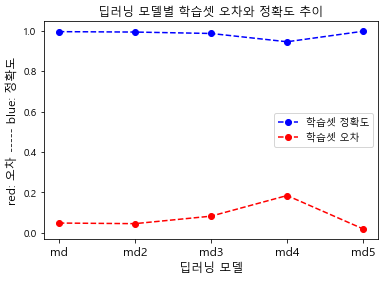

In [121]:
# 딥러닝 모델별 학습셋 오차과 정확도 추이

plt.plot(x_train_len, all_train_acc, 'bo--', label = '학습셋 정확도')
plt.plot(x_train_len, all_train_loss, 'ro--', label = '학습셋 오차')
plt.title('딥러닝 모델별 학습셋 오차와 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_train_len, ['md', 'md2', 'md3', 'md4', 'md5'], size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

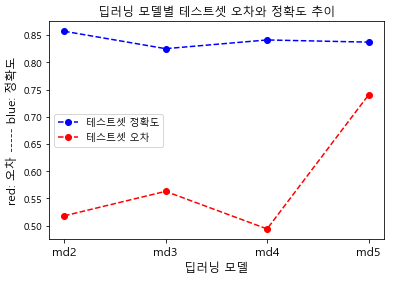

In [122]:
# 딥러닝 모델별 테스트셋 오차과 정확도 추이

plt.plot(x_test_len, all_test_acc, 'bo--', label = '테스트셋 정확도')
plt.plot(x_test_len, all_test_loss, 'ro--', label = '테스트셋 오차')
plt.title('딥러닝 모델별 테스트셋 오차와 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_test_len, ['md2', 'md3', 'md4', 'md5'], size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

### 딥러닝 모델별 학습셋과 테스트셋 성능비교

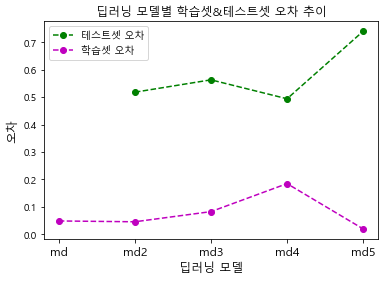

In [123]:
# 딥러닝모델별 학습셋&테스트셋 오차 추이

plt.plot(x_test_len, all_test_loss, 'go--', label = '테스트셋 오차')
plt.plot(x_train_len, all_train_loss, 'mo--', label = '학습셋 오차')
plt.title('딥러닝 모델별 학습셋&테스트셋 오차 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_train_len, ['md', 'md2', 'md3', 'md4', 'md5'], size = 12)
plt.ylabel('오차', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 의미임
# --> color = 'magenta', marker = 'o', linestyle = '--' 의미임

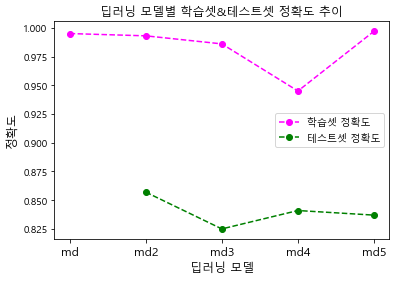

In [124]:
# 딥러닝모델별 학습셋&테스트셋 정확도 추이

plt.plot(x_train_len, all_train_acc, label = '학습셋 정확도',
         color = 'magenta', marker = 'o', linestyle = '--')
plt.plot(x_test_len, all_test_acc, label = '테스트셋 정확도',
         color = 'green', marker = 'o', linestyle = '--')
plt.title('딥러닝 모델별 학습셋&테스트셋 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_train_len, ['md', 'md2', 'md3', 'md4', 'md5'], size = 12)
plt.ylabel('정확도', size = 12)
plt.legend()

# 마커설정 옵션
# - color = 'cyan', marker = 'o', linestyle = '--' ==> 'co--'로 설정해도 됨
# - color = 'magenta', marker = 'o', linestyle = '--' ==> 'mo--'로 설정해도 됨

# <font color = 'blue'>딥러닝 훈련모델 저장과 재사용</font>

* 메모리상에 생성한 딥러닝 훈련모델의 성능이 좋을 때 이를 별도 파일로 저장하고 필요시 메모리로 로딩해 재활용 할 수 있음

### 딥러닝 모델 설정
* 모델 계층노드: 입력(60)-은닉(24)-은닉(10개)-출력(1)
* 모델 학습방법: model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
* 모델 학습실시: model.fit(X[train], y[train], epochs = 130, batch_size = 5)

### 딥러닝 데이터분할 방법 설정
* <font color = 'red'>md 모델</font>: 전체데이터셋을 피처변수셋과 타겟변수로 설정해 분석

* <font color = 'red'>md2 모델</font>: 훈련셋(train) 70%로 예측모델 도출 이후, 테스트셋(test) 30%로 예측모델 검증

* <font color = 'red'>md3 모델</font>: 훈련셋(train) 70%로 학습시 테스트셋(test) 30%를 검증셋(valid)으로 같이 입력해 예측모델 도출

* <font color = 'red'>md4 모델</font>: 훈련셋(train) 70% 중 20%를 검증셋(valid)으로 만들어 예측모델 도출하고, 테스트셋(test) 30%로 검증

* <font color = 'red'>md5 모델</font>: 전체데이터셋을 10개 폴드(부분데이터셋)로 나누어 10번에 걸친 훈련셋-검증셋으로 예측모델 검증

### 메모리상의 딥러닝 훈련모델을 파일로 저장

In [125]:
# 현재 메모리상에 있는 훈련모델 객체를 하드디스크에 저장
md.save('sonar_md.h5')
md2.save('sonar_md2.h5')
md3.save('sonar_md3.h5')
md4.save('sonar_md4.h5')
md5.save('sonar_md5.h5')

# - .h5확장자: HDF 파일포맷(Hierarchical Data Format: 계층적 데이터 형식)
# - 대용량 데이터저장과 빠른 검색속도를 지원하는 포맷임

In [126]:
# 하드디스크에 저장된 훈련모델 객체 파일 확인
import glob

glob.glob('*.h5')

['boston_md.h5',
 'boston_md2.h5',
 'boston_md3.h5',
 'boston_md4.h5',
 'iris_md.h5',
 'iris_md2.h5',
 'iris_md3.h5',
 'iris_md4.h5',
 'iris_md4_rb.h5',
 'mymd.h5',
 'my_md.h5',
 'my_md2.h5',
 'my_md3.h5',
 'my_md4.h5',
 'my_md5.h5',
 'my_model.h5',
 'pima_md.h5',
 'pima_md2.h5',
 'pima_md3.h5',
 'pima_md4.h5',
 'pima_md4_rb.h5',
 'sonar_md.h5',
 'sonar_md2.h5',
 'sonar_md3.h5',
 'sonar_md4.h5',
 'sonar_md5.h5',
 'wine_md.h5',
 'wine_md2.h5',
 'wine_md3.h5',
 'wine_md4.h5',
 'wine_md5.h5']

### 메모리상의 딥러닝 훈련모델 삭제

In [127]:
# 현재 메모리상에 있던 특정객체 삭제
del md

In [128]:
# 현재 메모리상에 있던 여러개 객체 동시 삭제
del md2, md3, md4, md5

In [129]:
# 현재 메모리 객체목록 확인
%whos

Variable                Type               Data/Info
----------------------------------------------------
Dense                   type               <class 'keras.layers.core.Dense'>
LabelEncoder            type               <class 'sklearn.preproces<...>sing.label.LabelEncoder'>
Sequential              type               <class 'keras.engine.sequential.Sequential'>
StratifiedKFold         ABCMeta            <class 'sklearn.model_sel<...>._split.StratifiedKFold'>
X                       ndarray            208x60: 12480 elems, type `float64`, 99840 bytes
X_arr                   ndarray            208x60: 12480 elems, type `object`, 99840 bytes
X_df                    DataFrame                   v1      v2      <...>\n[208 rows x 60 columns]
X_test                  DataFrame                   v1      v2      <...>n\n[63 rows x 60 columns]
X_train                 DataFrame                   v1      v2      <...>\n[145 rows x 60 columns]
all_test_acc            list               n=4
all_

### 하드디스크에 있는 딥러닝 훈련모델 파일을 메모리로 로딩

In [130]:
from keras.models import load_model
md = load_model('sonar_md.h5')
md2 = load_model('sonar_md2.h5')
md3 = load_model('sonar_md3.h5')
md4 = load_model('sonar_md4.h5')
md5 = load_model('sonar_md5.h5')

### 로딩한 훈련모델 재사용

In [131]:
md_test_perf = md.evaluate(X_test, y_test)
md_test_loss = md_test_perf[0]
md_test_acc = md_test_perf[1]

print('테스트셋 성능종합:', [round(i, 3) for i in md_test_perf])
print(f'테스트셋 오차(loss): {md_test_loss:0.3f}')
print(f'테스트셋 정확도(accuracy): {md_test_acc:0.3f}')

63/63 [==============================] - 0s 5ms/step
테스트셋 성능종합: [0.024, 1.0]
테스트셋 오차(loss): 0.024
테스트셋 정확도(accuracy): 1.000


# End of Source